In [7]:
from constructor import *

### 1) Considerar un par de orbitas en potencial NFW esferico, similar a MW

In [8]:
# Valores extraidos del fit A de (Wang, 2015) https://doi.org/10.1093/mnras/stv1647
sphPot = gp.NFWPotential.from_M200_c(M200 = 1.842e12 * u.M_sun, c= 16.098, units=galactic)
sphPot

<NFWPotential: m=9.71e+11, r_s=16.07, a=1.00, b=1.00, c=1.00 (kpc,Myr,solMass,rad)>

In [9]:
import gala.dynamics as gd
r_1 = [0,0,8] * u.kpc
v_1 = [200,0,0] * (u.km/u.s)
r_2 = [10,8,30] * u.kpc
v_2 = [-20,0,-20] * (u.km/u.s)

obj1 = gd.PhaseSpacePosition(r_1,v_1)
obj2 = gd.PhaseSpacePosition(r_2,v_2)

### 2) Calcular y graficar la evolucion temporal de las orbitas

In [10]:
dt = 0.4*u.Myr
t_f = 10*u.Gyr
orbit1 = gp.Hamiltonian(sphPot).integrate_orbit(obj1, dt=dt, n_steps=t_f/dt)
orbit2 = gp.Hamiltonian(sphPot).integrate_orbit(obj2, dt=dt, n_steps=t_f/dt)

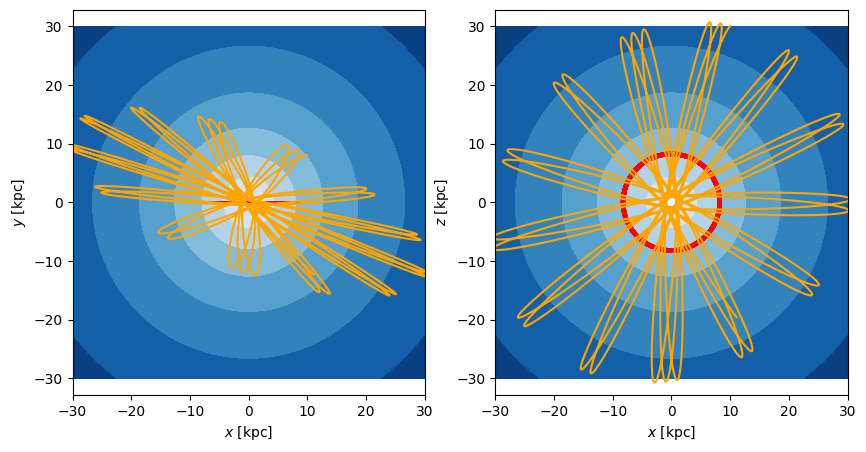

In [11]:
grid = np.linspace(-30,30,1000)

fig,ax = plt.subplots(1,2,figsize=(10,5))
orbit1.plot(components=['x','y'], color='red', axes=ax[0])
orbit2.plot(components=['x','y'], color='orange', axes=ax[0])
sphPot.plot_contours(grid=(grid,grid,0), ax=ax[0])
ax[0].set_xlim(grid[0],grid[-1])
ax[0].set_ylim(grid[0],grid[-1])

orbit1.plot(components=['x','z'], color='red', axes=ax[1])
orbit2.plot(components=['x','z'], color='orange', axes=ax[1])
sphPot.plot_contours(grid=(grid,0,grid), ax=ax[1])
ax[1].set_xlim(grid[0],grid[-1])
ax[1].set_ylim(grid[0],grid[-1])

plt.show()

### 3) Definir un volumen bien pequeño en el espacio de fases:
* Utilizar distribuciones Gaussianas 3D(sin covariacias) en posiciones y velocidades
* Utilizar las condiciones iniciales de mis orbitas como medias de las gaussianas
* Tomar sigma_x y sigma_v bien pequeños($~10^{-5}$)
* De estas Gaussianas, extraer un ser de 1000 C.Is adicionales

In [12]:
x1 = np.random.normal(loc=np.array(r_1),scale=np.array([1e-5,1e-5,1e-5]).T,size=(1000,3))
v1 = np.random.normal(loc=v_1,scale=[1,1,1],size=(1000,3))
w1 = gd.PhaseSpacePosition(pos=x1.T*u.kpc,vel=v1.T*u.km/u.s)

x2 = np.random.normal(loc=np.array(r_2),scale=np.array([1e-5,1e-5,1e-5]).T,size=(1000,3))
v2 = np.random.normal(loc=v_2,scale=[1,1,1],size=(1000,3))
w2 = gd.PhaseSpacePosition(pos=x2.T*u.kpc,vel=v2.T*u.km/u.s)

(<Figure size 1200x400 with 3 Axes>, <Figure size 1200x400 with 3 Axes>)

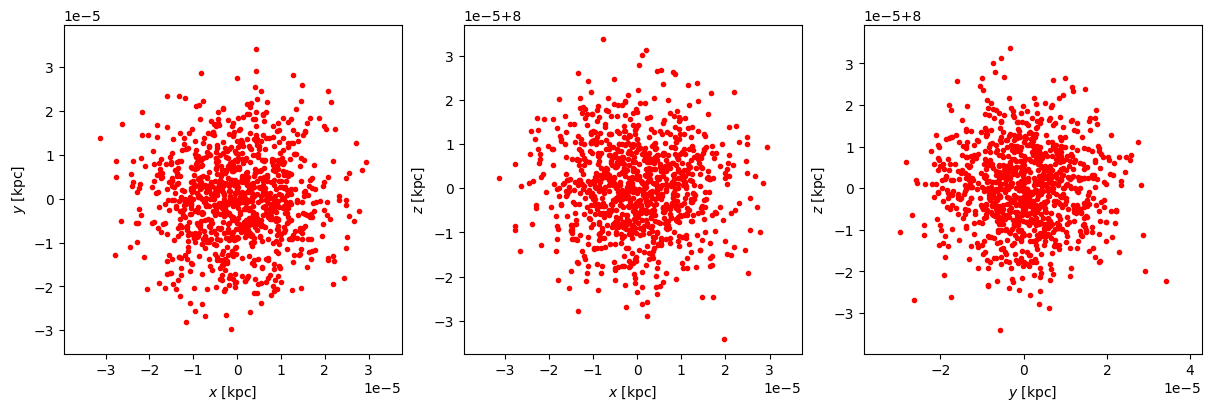

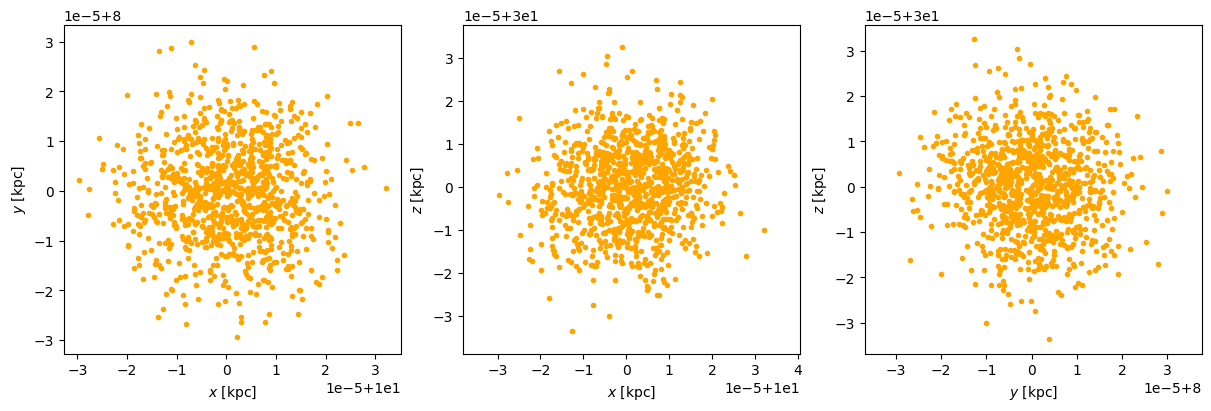

In [13]:
w1.plot(color='red'),w2.plot(color='orange')

(<Figure size 1200x400 with 3 Axes>, <Figure size 1200x400 with 3 Axes>)

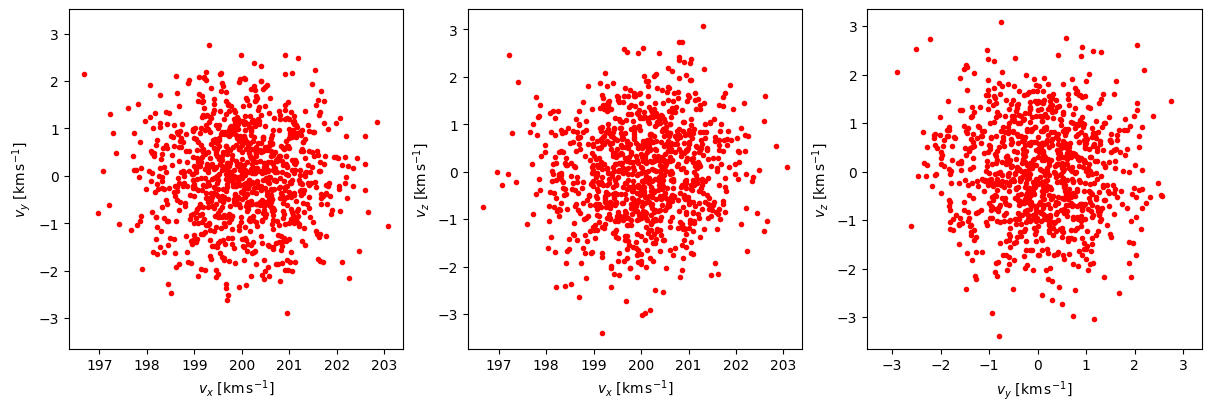

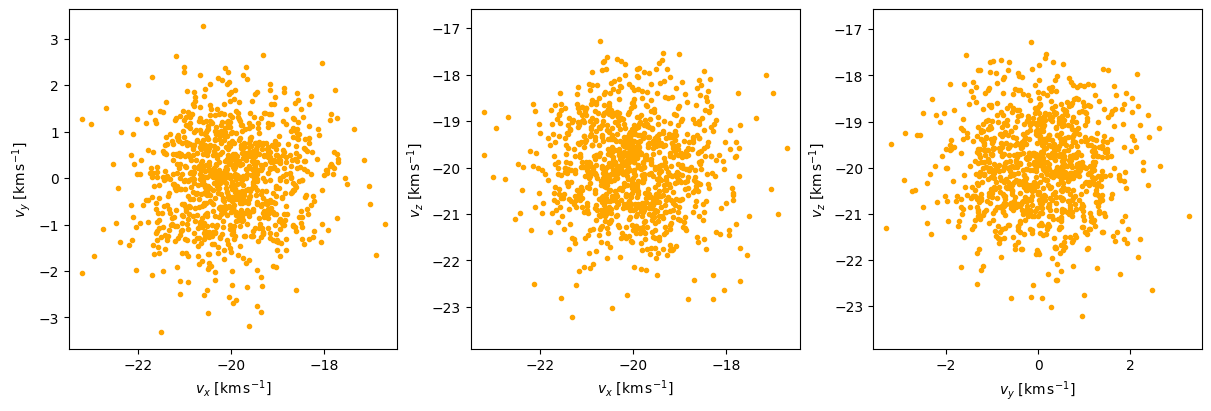

In [14]:
w1.plot(components=['v_x','v_y','v_z'],c='red'),w2.plot(components=['v_x','v_y','v_z'],c='orange')

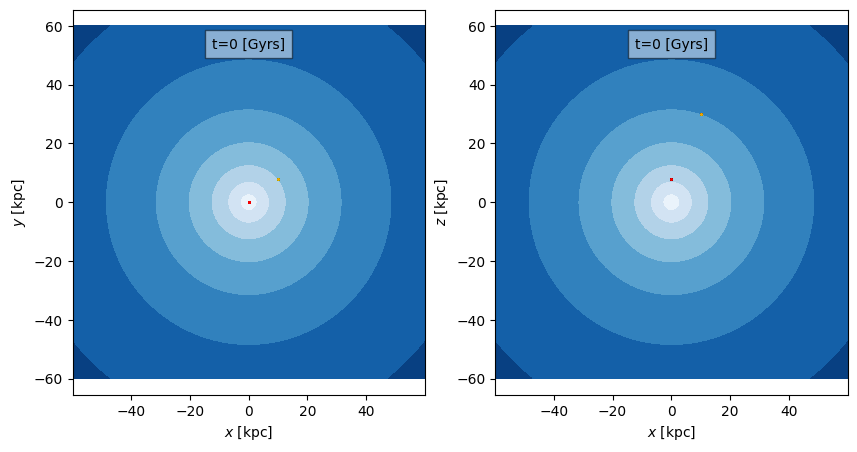

In [23]:
grid = np.linspace(-60,60,1000)

fig,ax = plt.subplots(1,2,figsize=(10,5))
w1.plot(components=['x','y'], color='red', axes=ax[0], s=.1, zorder=100)
w2.plot(components=['x','y'], color='orange', axes=ax[0], s=.1, zorder=100)
sphPot.plot_contours(grid=(grid,grid,0), ax=ax[0])
ax[0].set_xlim(grid[1],grid[-2])
ax[0].set_ylim(grid[1],grid[-2])

w1.plot(components=['x','z'], color='red', axes=ax[1], s=.1, zorder=100)
w2.plot(components=['x','z'], color='orange', axes=ax[1], s=.1, zorder=100)
sphPot.plot_contours(grid=(grid,0,grid), ax=ax[1])
ax[1].set_xlim(grid[1],grid[-2])
ax[1].set_ylim(grid[1],grid[-2])

ax[0].text(0.5,0.90, "t=0 [Gyrs]", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax[0].transAxes, ha="center", zorder=1000)
ax[1].text(0.5,0.90, "t=0 [Gyrs]", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax[1].transAxes, ha="center", zorder=1000)


plt.show()

### 4) Integrar cada una de estas orbitas por 10Gyr. Llamaremos al conjunto total "enjambre"

In [24]:
orbits_swarm1 = gp.Hamiltonian(sphPot).integrate_orbit(w1, dt=dt, n_steps=t_f/dt)
orbits_swarm2 = gp.Hamiltonian(sphPot).integrate_orbit(w2, dt=dt, n_steps=t_f/dt)

### 5) Graficar y observar la evolucion de las orbitas del enjambre

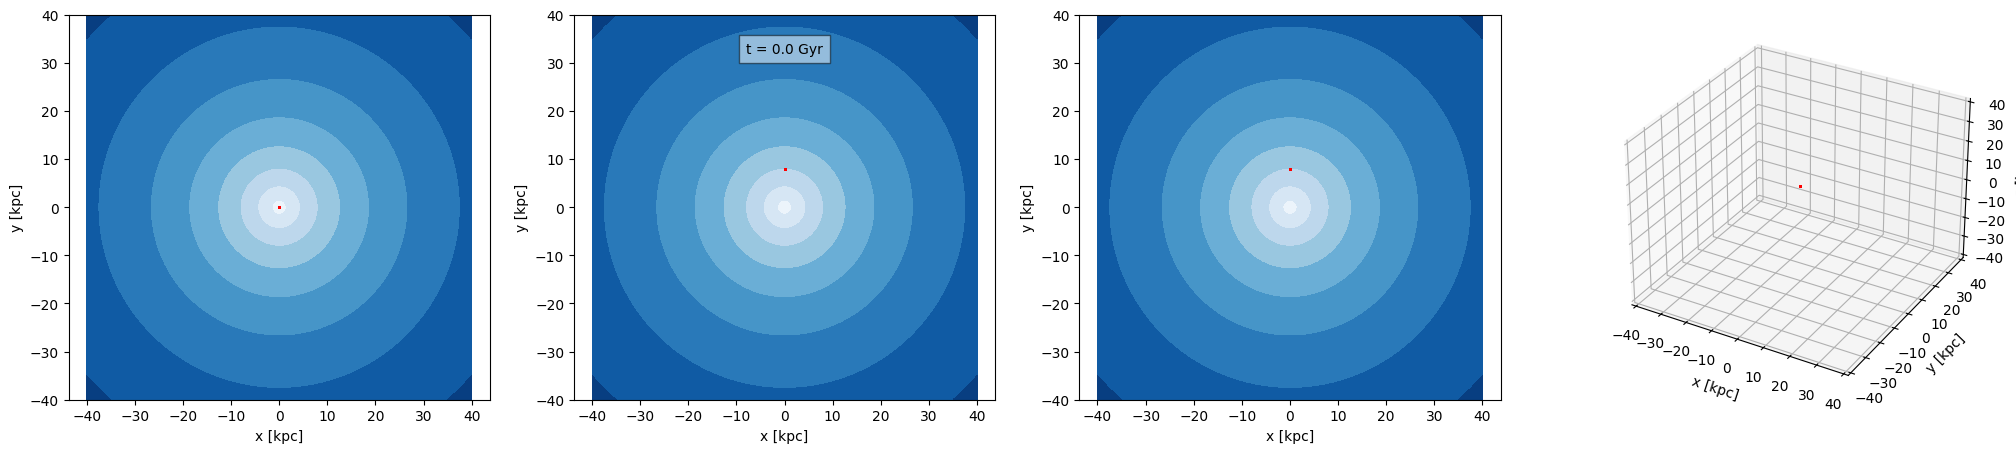

In [103]:
from matplotlib.animation import FuncAnimation

frames = np.arange(0,25000,50)
fps = 24
orbit = orbits_swarm1
color = 'red'
pot = sphPot
grid = np.linspace(-40,40,1000)
#def generate_movie(orbit, pot)
fig,axes = plt.subplots(1,4,figsize=(25,5))


i_t = 0
x,y,z = orbit[:,:].x,orbit[:,:].y,orbit[:,:].z
v_x,v_y,v_z = orbit[:,:].v_x,orbit[:,:].v_y,orbit[:,:].v_z

for ax in axes:
    contour = pot.plot_contours(grid=(0,grid,grid), ax=ax)

scatxy = axes[0].scatter(x[i_t],y[i_t], s=0.8, c=color)
axes[0].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
axes[0].axis('equal')

scatxz = axes[1].scatter(x[i_t],z[i_t], s=0.8, c=color)
axes[1].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
axes[1].axis('equal')

scatyz = axes[2].scatter(y[i_t],z[i_t], s=0.8, c=color)
axes[2].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
axes[2].axis('equal')

time_text = axes[1].text(0.5,0.90, "t=0 [Gyrs]", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=axes[1].transAxes, ha="center", zorder=1000)

axes[3].remove()
axes[3] = fig.add_subplot(1,4,4,projection='3d')
scat3d = axes[3].scatter(x[i_t],y[i_t],z[i_t])
axes[3].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], zlim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]', zlabel='z [kpc]')

def draw(frame):
    print(np.round(frame/frames[-1]*100,2), end='%\r')
    hor = x[frame]
    ver = y[frame]
    data = np.stack([hor,ver]).T
    scatxy.set_offsets(data)
    hor = x[frame]
    ver = z[frame]
    data = np.stack([hor,ver]).T
    scatxz.set_offsets(data)
    hor = y[frame]
    ver = z[frame]
    data = np.stack([hor,ver]).T
    scatyz.set_offsets(data)
    axes[3].clear()
    axes[3].scatter(x[frame],y[frame],z[frame], s=.8, c=color)
    axes[3].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], zlim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]', zlabel='z [kpc]')
    tiempo = np.round(orbit.t[frame].to('Gyr'),2)
    time_text.set_text(f"t = {tiempo}")
    return scatxy

anim = FuncAnimation(fig=fig, func=draw, frames=frames, interval=1000/fps)
anim.save('swarm1.mp4')

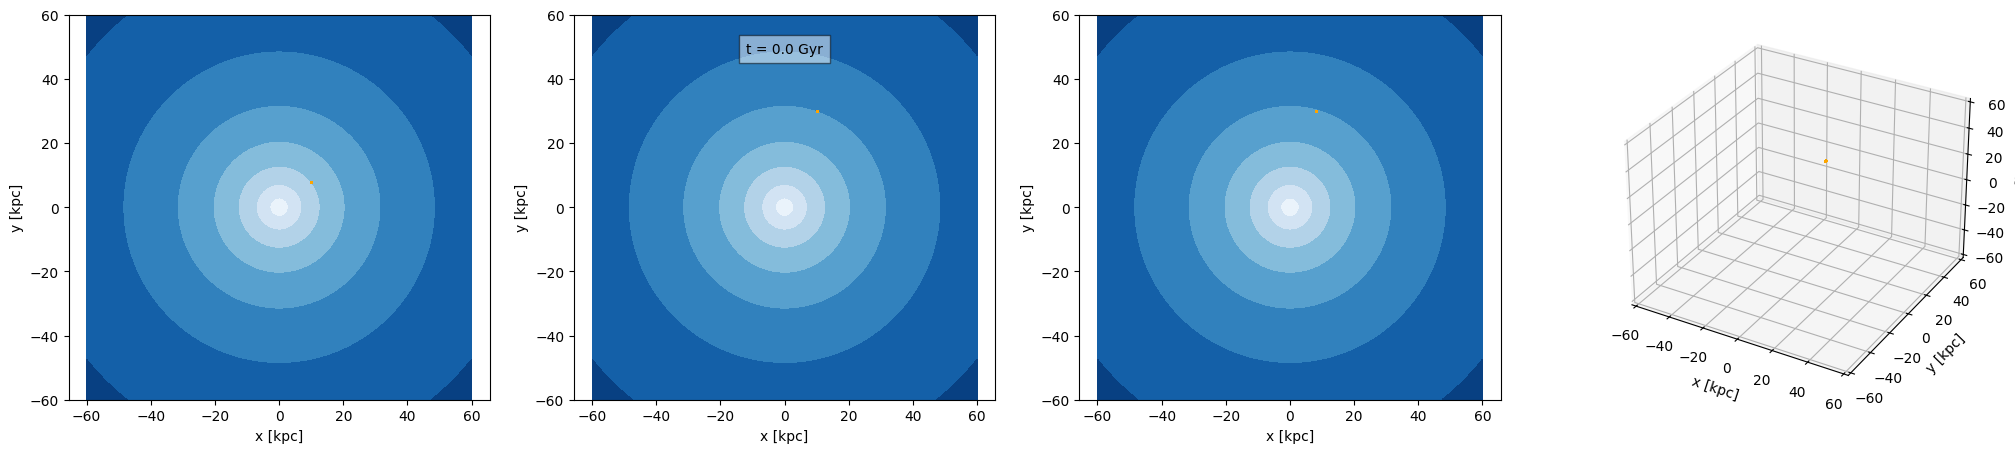

In [104]:
from matplotlib.animation import FuncAnimation

frames = np.arange(0,25000,50)
fps = 24
orbit = orbits_swarm2
color = 'orange'
pot = sphPot
grid = np.linspace(-60,60,1000)
#def generate_movie(orbit, pot)
fig,axes = plt.subplots(1,4,figsize=(25,5))


i_t = 0
x,y,z = orbit[:,:].x,orbit[:,:].y,orbit[:,:].z
v_x,v_y,v_z = orbit[:,:].v_x,orbit[:,:].v_y,orbit[:,:].v_z

for ax in axes:
    contour = pot.plot_contours(grid=(0,grid,grid), ax=ax)

scatxy = axes[0].scatter(x[i_t],y[i_t], s=0.8, c=color)
axes[0].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
axes[0].axis('equal')

scatxz = axes[1].scatter(x[i_t],z[i_t], s=0.8, c=color)
axes[1].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
axes[1].axis('equal')

scatyz = axes[2].scatter(y[i_t],z[i_t], s=0.8, c=color)
axes[2].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
axes[2].axis('equal')

time_text = axes[1].text(0.5,0.90, "t=0 [Gyrs]", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=axes[1].transAxes, ha="center", zorder=1000)

axes[3].remove()
axes[3] = fig.add_subplot(1,4,4,projection='3d')
scat3d = axes[3].scatter(x[i_t],y[i_t],z[i_t])
axes[3].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], zlim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]', zlabel='z [kpc]')

def draw(frame):
    print(np.round(frame/frames[-1]*100,2), end='%\r')
    hor = x[frame]
    ver = y[frame]
    data = np.stack([hor,ver]).T
    scatxy.set_offsets(data)
    hor = x[frame]
    ver = z[frame]
    data = np.stack([hor,ver]).T
    scatxz.set_offsets(data)
    hor = y[frame]
    ver = z[frame]
    data = np.stack([hor,ver]).T
    scatyz.set_offsets(data)
    axes[3].clear()
    axes[3].scatter(x[frame],y[frame],z[frame], s=.8, c=color)
    axes[3].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], zlim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]', zlabel='z [kpc]')
    tiempo = np.round(orbit.t[frame].to('Gyr'),2)
    time_text.set_text(f"t = {tiempo}")
    return scatxy

anim = FuncAnimation(fig=fig, func=draw, frames=frames, interval=1000/fps)
anim.save('swarm2.mp4')

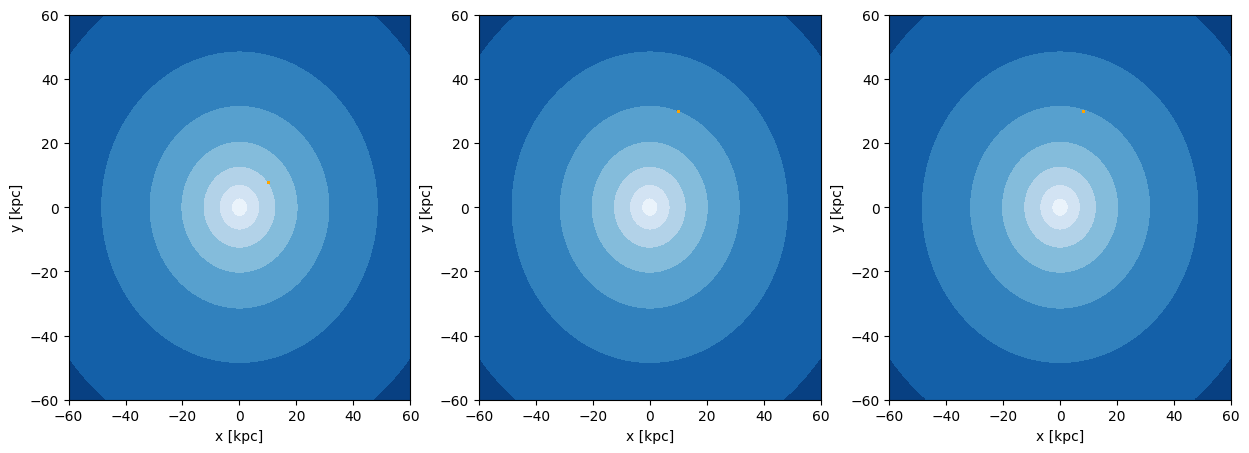

In [105]:
from matplotlib.animation import FuncAnimation

end = 25000
fps = 24
orbit = orbits_swarm2
pot = sphPot
grid = np.linspace(-60,60,1000)
#def generate_movie(orbit, pot)
fig,axes = plt.subplots(1,3,figsize=(15,5))


i_t = 0
x,y,z = orbit[:,:].x,orbit[:,:].y,orbit[:,:].z
v_x,v_y,v_z = orbit[:,:].v_x,orbit[:,:].v_y,orbit[:,:].v_z

for ax in axes:
    contour = pot.plot_contours(grid=(0,grid,grid), ax=ax)

scatxy = axes[0].scatter(x[i_t],y[i_t], s=0.8, c='orange')
axes[0].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')

scatxz = axes[1].scatter(x[i_t],z[i_t], s=0.8, c='orange')
axes[1].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')

scatyz = axes[2].scatter(y[i_t],z[i_t], s=0.8, c='orange')
axes[2].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')

def draw(frame):
    print(np.round(frame/end*100,2), end='%\r')
    hor = x[frame]
    ver = y[frame]
    data = np.stack([hor,ver]).T
    scatxy.set_offsets(data)
    hor = x[frame]
    ver = z[frame]
    data = np.stack([hor,ver]).T
    scatxz.set_offsets(data)
    hor = y[frame]
    ver = z[frame]
    data = np.stack([hor,ver]).T
    scatyz.set_offsets(data)
    return scatxy

anim = FuncAnimation(fig=fig, func=draw, frames=end, interval=1000/fps)
anim.save('swarm2.mp4')

In [106]:
from IPython.display import Audio
sound_file = '/home/mbugueno/Downloads/notiPallero D.fication.mp3'
Audio(sound_file, autoplay=True)

### 6) Graficar y observar evolucion del sigma_x y sigma_v del enjambre. Probar con los sigma 3D y los sigmas en cada dimension por separado

#### Fiteo de gaussianas :P

In [107]:
from scipy.stats import norm

mean_v_x_1, sigma_v_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_y_1, sigma_v_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_z_1, sigma_v_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_x_1, sigma_r_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_y_1, sigma_r_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_z_1, sigma_r_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_1, sigma_r_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_1, sigma_v_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_x_2, sigma_v_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_y_2, sigma_v_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_z_2, sigma_v_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_x_2, sigma_r_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_y_2, sigma_r_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_z_2, sigma_r_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_r_2, sigma_r_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
mean_v_2, sigma_v_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))

t = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
    t[i_t] = i_t*dt.value
    # Load all phase space values(len equal to amount of particles)
    v_x_1 = orbits_swarm1[i_t,:].vel.d_x
    v_y_1 = orbits_swarm1[i_t,:].vel.d_x
    v_z_1 = orbits_swarm1[i_t,:].vel.d_x
    r_x_1 = orbits_swarm1[i_t,:].pos.x
    r_y_1 = orbits_swarm1[i_t,:].pos.y
    r_z_1 = orbits_swarm1[i_t,:].pos.z
    r_1 = orbits_swarm1[i_t,:].pos.norm()
    v_1 = orbits_swarm1[i_t,:].vel.norm()
    v_x_2 = orbits_swarm2[i_t,:].vel.d_x
    v_y_2 = orbits_swarm2[i_t,:].vel.d_x
    v_z_2 = orbits_swarm2[i_t,:].vel.d_x
    r_x_2 = orbits_swarm2[i_t,:].pos.x
    r_y_2 = orbits_swarm2[i_t,:].pos.y
    r_z_2 = orbits_swarm2[i_t,:].pos.z
    r_2 = orbits_swarm2[i_t,:].pos.norm()
    v_2 = orbits_swarm2[i_t,:].vel.norm()
    # Fit de los valores por cada uno
    mean_v_x_1[i_t], sigma_v_x_1[i_t] = norm.fit(v_x_1)
    mean_v_y_1[i_t], sigma_v_y_1[i_t] = norm.fit(v_y_1)
    mean_v_z_1[i_t], sigma_v_z_1[i_t] = norm.fit(v_z_1)
    mean_r_x_1[i_t], sigma_r_x_1[i_t] = norm.fit(r_x_1)
    mean_r_y_1[i_t], sigma_r_y_1[i_t] = norm.fit(r_y_1)
    mean_r_z_1[i_t], sigma_r_z_1[i_t] = norm.fit(r_z_1)
    mean_r_1[i_t], sigma_r_1[i_t] = norm.fit(r_1)
    mean_v_1[i_t], sigma_v_1[i_t] = norm.fit(v_1)
    mean_v_x_2[i_t], sigma_v_x_2[i_t] = norm.fit(v_x_2)
    mean_v_y_2[i_t], sigma_v_y_2[i_t] = norm.fit(v_y_2)
    mean_v_z_2[i_t], sigma_v_z_2[i_t] = norm.fit(v_z_2)
    mean_r_x_2[i_t], sigma_r_x_2[i_t] = norm.fit(r_x_2)
    mean_r_y_2[i_t], sigma_r_y_2[i_t] = norm.fit(r_y_2)
    mean_r_z_2[i_t], sigma_r_z_2[i_t] = norm.fit(r_z_2)
    mean_r_2[i_t], sigma_r_2[i_t] = norm.fit(r_2)
    mean_v_2[i_t], sigma_v_2[i_t] = norm.fit(v_2)

In [108]:
# unit assignment
mean_v_x_1 *= u.Myr/u.s
mean_v_y_1 *= u.Myr/u.s
mean_v_z_1 *= u.Myr/u.s
mean_r_x_1 *= u.kpc
mean_r_y_1 *= u.kpc
mean_r_z_1 *= u.kpc
mean_r_1 *= u.kpc
mean_v_1 *= u.Myr/u.s
mean_v_x_2 *= u.Myr/u.s
mean_v_y_2 *= u.Myr/u.s
mean_v_z_2 *= u.Myr/u.s
mean_r_x_2 *= u.kpc
mean_r_y_2 *= u.kpc
mean_r_z_2 *= u.kpc
mean_r_2 *= u.kpc
mean_v_2 *= u.Myr/u.s
sigma_v_x_1 *= u.Myr/u.s
sigma_v_y_1 *= u.Myr/u.s
sigma_v_z_1 *= u.Myr/u.s
sigma_r_x_1 *= u.kpc
sigma_r_y_1 *= u.kpc
sigma_r_z_1 *= u.kpc
sigma_r_1 *= u.kpc
sigma_v_1 *= u.Myr/u.s
sigma_v_x_2 *= u.Myr/u.s
sigma_v_y_2 *= u.Myr/u.s
sigma_v_z_2 *= u.Myr/u.s
sigma_r_x_2 *= u.kpc
sigma_r_y_2 *= u.kpc
sigma_r_z_2 *= u.kpc
sigma_r_2 *= u.kpc
sigma_v_2 *= u.Myr/u.s
t *= u.Myr

#### Ploteo ;D

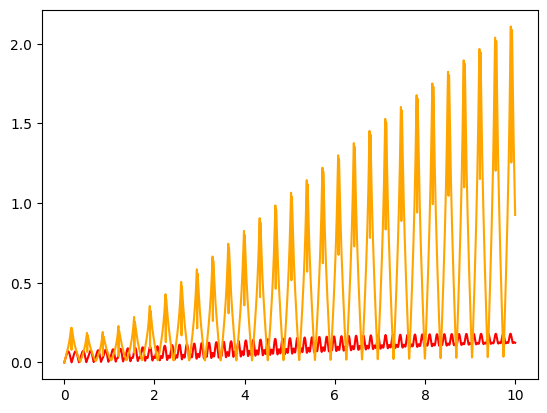

In [109]:
t = t.to('Gyr')
plt.plot(t,sigma_r_1,c='red')
plt.plot(t,sigma_r_2,c='orange')

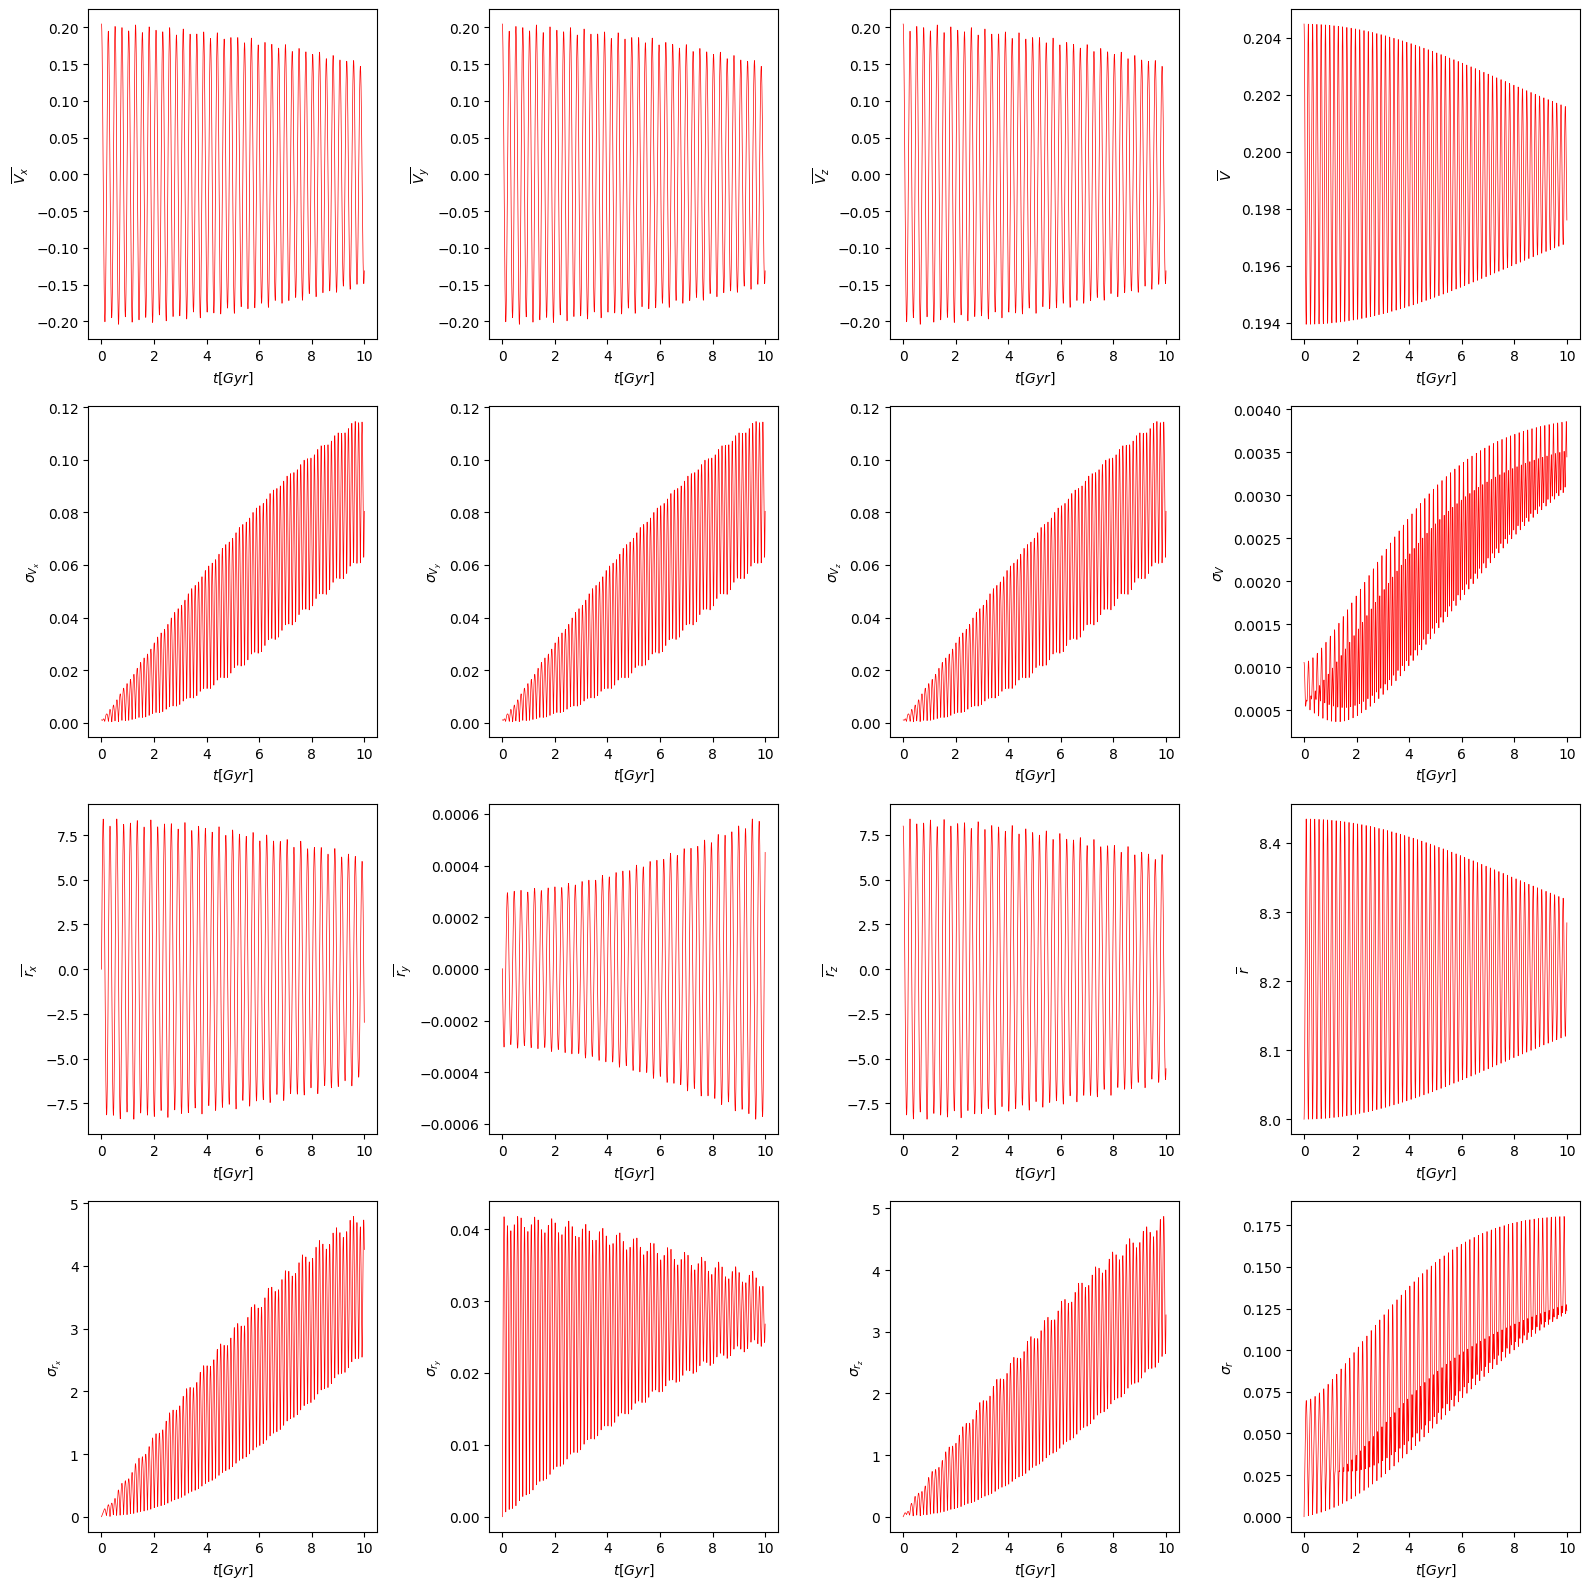

In [110]:
fig, axes = plt.subplots(4,4, figsize=(16,16))

list = [mean_v_x_1,mean_v_y_1,mean_v_z_1,mean_v_1,sigma_v_x_1,sigma_v_y_1,sigma_v_z_1,sigma_v_1,mean_r_x_1,mean_r_y_1,mean_r_z_1,mean_r_1,sigma_r_x_1,sigma_r_y_1,sigma_r_z_1,sigma_r_1]
name = [r'$\overline{V_x}$',r'$\overline{V_y}$',r'$\overline{V_z}$',r'$\overline{V}$',r'$\sigma_{V_x}$',r'$\sigma_{V_y}$',r'$\sigma_{V_z}$',r'$\sigma_{V}$',r'$\overline{r_x}$',r'$\overline{r_y}$',r'$\overline{r_z}$',r'$\overline{r}$',r'$\sigma_{r_x}$',r'$\sigma_{r_y}$',r'$\sigma_{r_z}$',r'$\sigma_{r}$']

i = 0
for row in axes:
    for col in row:
        col.plot(t,list[i], linewidth=.5,c='red')
        col.set_ylabel(name[i])
        col.set_xlabel(r'$t [Gyr]$')
        i += 1

fig.tight_layout()

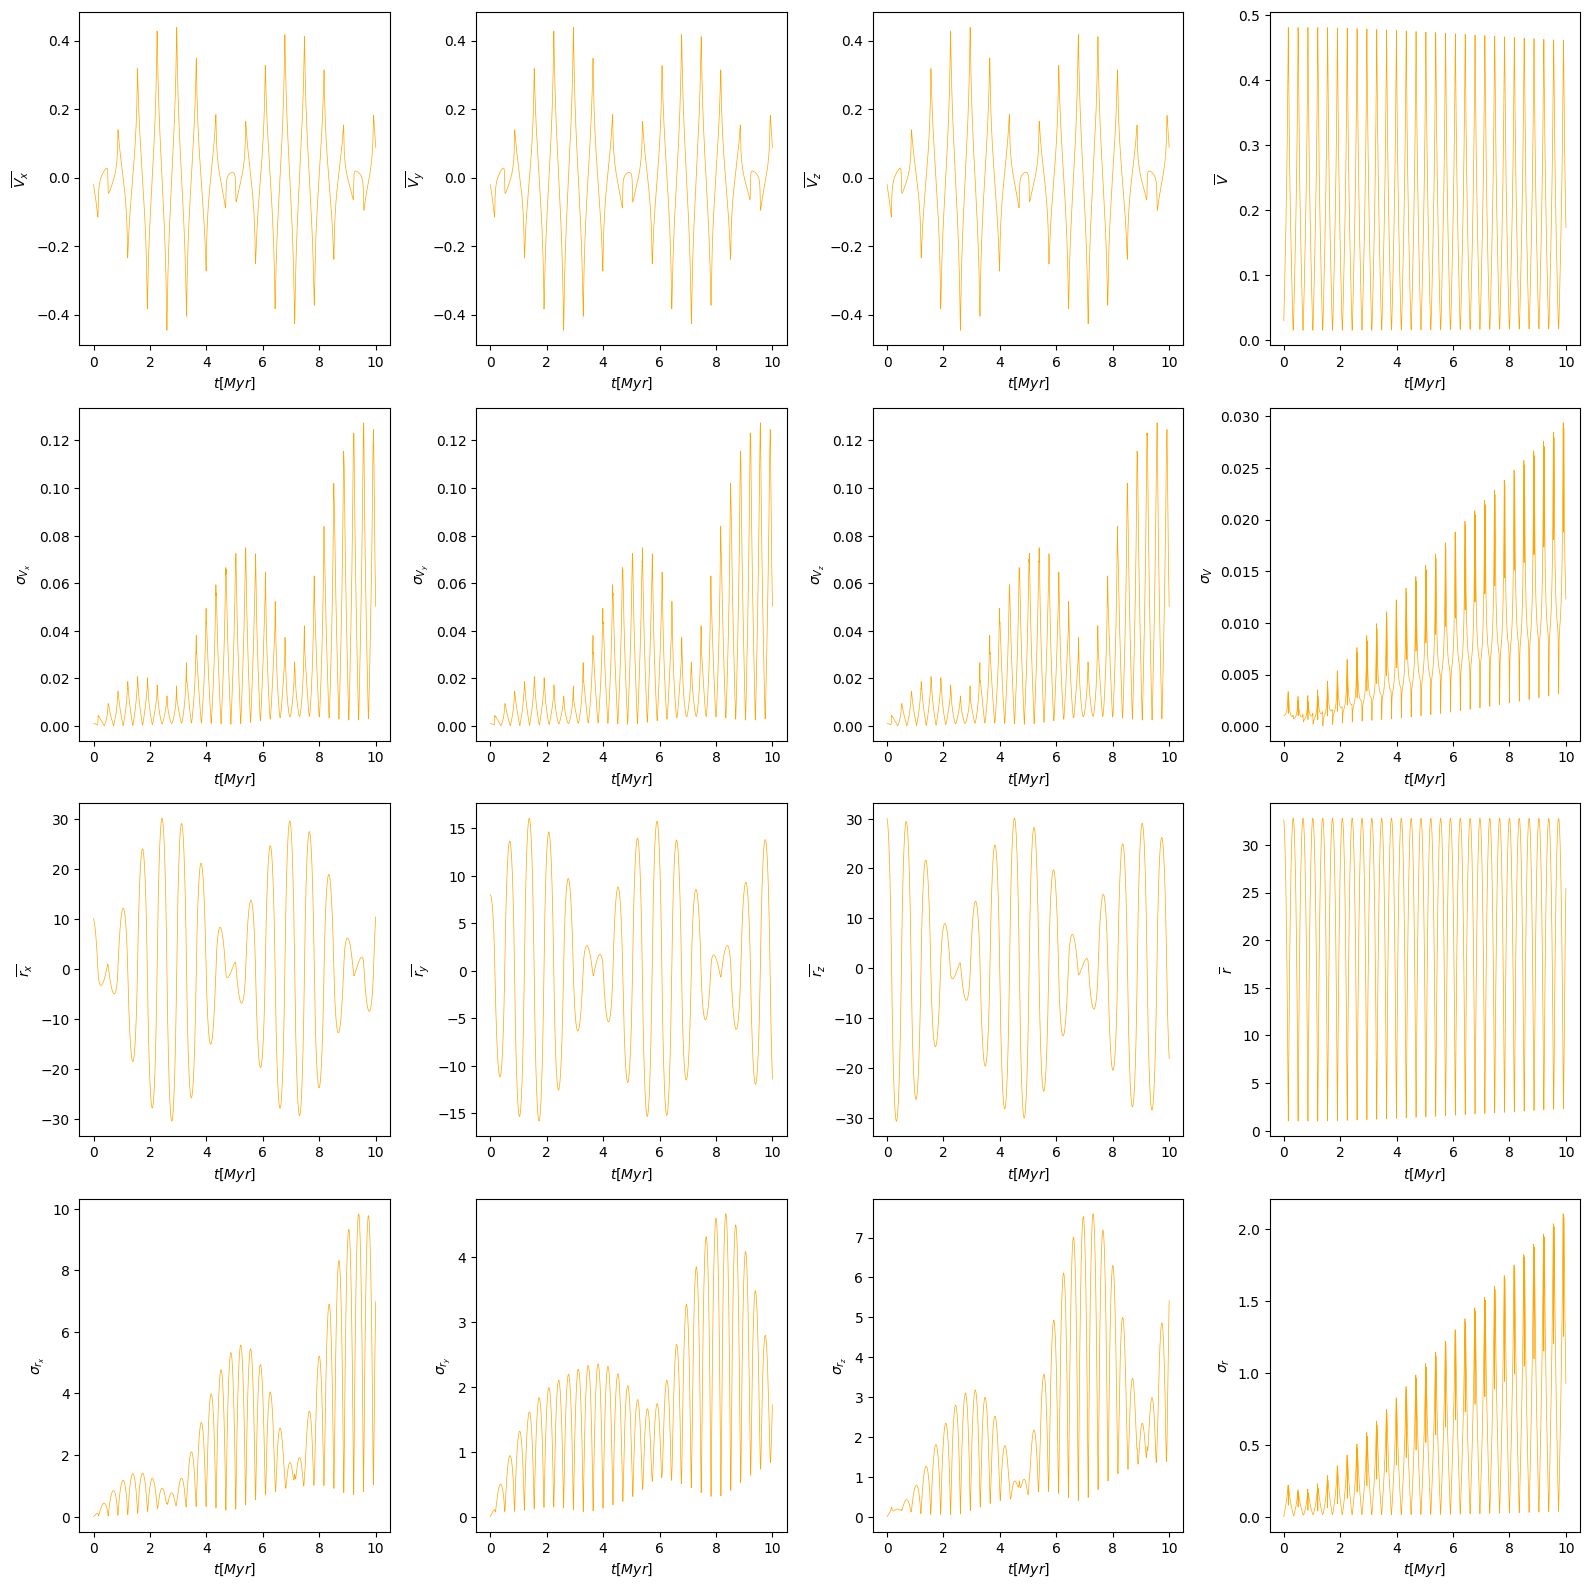

In [111]:
fig, axes = plt.subplots(4,4, figsize=(16,16))

list = [mean_v_x_2,mean_v_y_2,mean_v_z_2,mean_v_2,sigma_v_x_2,sigma_v_y_2,sigma_v_z_2,sigma_v_2,mean_r_x_2,mean_r_y_2,mean_r_z_2,mean_r_2,sigma_r_x_2,sigma_r_y_2,sigma_r_z_2,sigma_r_2]
name = [r'$\overline{V_x}$',r'$\overline{V_y}$',r'$\overline{V_z}$',r'$\overline{V}$',r'$\sigma_{V_x}$',r'$\sigma_{V_y}$',r'$\sigma_{V_z}$',r'$\sigma_{V}$',r'$\overline{r_x}$',r'$\overline{r_y}$',r'$\overline{r_z}$',r'$\overline{r}$',r'$\sigma_{r_x}$',r'$\sigma_{r_y}$',r'$\sigma_{r_z}$',r'$\sigma_{r}$']


i = 0
for row in axes:
    for col in row:
        col.plot(t,list[i], linewidth=.5,c='orange')
        col.set_ylabel(name[i])
        col.set_xlabel(r'$t [Gyr]$')
        i += 1

fig.tight_layout()

### 7) Tomar esferas de 1 y 2,5 kpc de radio, centradas a todo tiempo t, en la orbita central del enjambre. En cada paso de integracion, calcular la densidad de particulas dentro de estas esferas.

In [112]:
R_1,R_2 = 1,2.5

V_1 = (4/3)*np.pi*(R_1*u.kpc)**3
V_2 = (4/3)*np.pi*(R_2*u.kpc)**3

In [113]:
V_1,V_2

(<Quantity 4.1887902 kpc3>, <Quantity 65.44984695 kpc3>)

In [114]:
rho1_1 = np.zeros(int(t_f/dt))
rho1_2 = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
    r_1 = orbits_swarm1[i_t,:].pos - orbit1.pos[i_t]
    r_1 = r_1.norm()
    rho1_1[i_t] = len(np.where(r_1.value < R_1)[0])/V_1.value
    rho1_2[i_t] = len(np.where(r_1.value < R_2)[0])/V_2.value

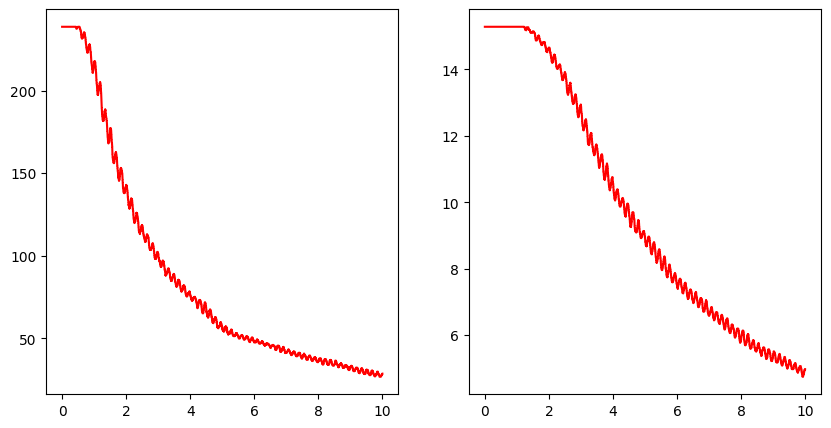

In [115]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(t,rho1_1,c='red')
axes[1].plot(t,rho1_2,c='red')

In [116]:
rho2_1 = np.zeros(int(t_f/dt))
rho2_2 = np.zeros(int(t_f/dt))

for i_t in range(int(t_f/dt)):
    r_2 = orbits_swarm2[i_t,:].pos - orbit2.pos[i_t]
    r_2 = r_2.norm()
    rho2_1[i_t] = len(np.where(r_2.value < R_1)[0])/V_1.value
    rho2_2[i_t] = len(np.where(r_2.value < R_2)[0])/V_2.value

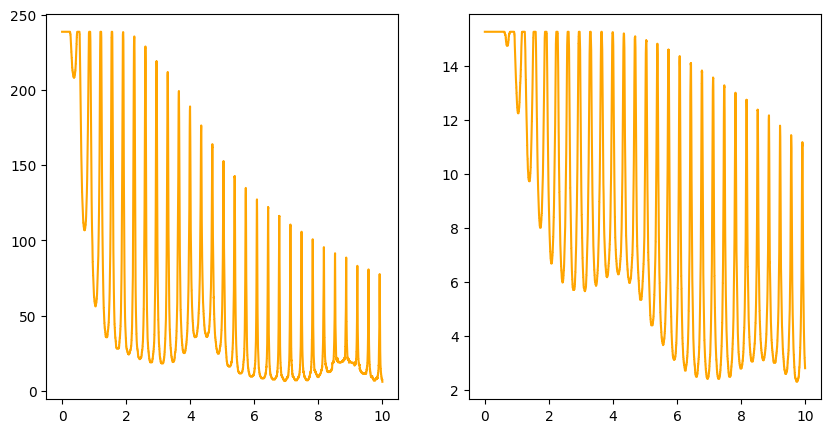

In [117]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(t,rho2_1,c='orange')
axes[1].plot(t,rho2_2,c='orange')

### 8) Repetir el experimento considerando:
* Un potencial NFW triaxial
* Un potencial MW-like

#### Funcion epico fantastica que genera todos los plots dado pot y 2 ics

In [26]:
# debido a que es posible que se requiera cambiar potencial y ics mucho aqui hay una funcion que hace todo lo de arriba dado un potencial y 2 ics
# por que dioh mio
from scipy.stats import norm
from constructor import *
from matplotlib.animation import FuncAnimation

def the_whole_damn_thing(pot,r_1,v_1,r_2,v_2,
                         frames = np.arange(0,25000,100),
                         dt=0.4*u.Myr,t_f=10*u.Gyr,
                         sigma_3d_r=1e-5,
                         sigma_3d_v=1,
                         grid=np.linspace(-40,40,1000),
                         R_1=1,R_2=2.5,
                         animate=False,
                         fps=24
                        ):
    obj1 = gd.PhaseSpacePosition(r_1,v_1)
    obj2 = gd.PhaseSpacePosition(r_2,v_2)
    orbit1 = gp.Hamiltonian(pot).integrate_orbit(obj1, dt=dt, n_steps=t_f/dt)
    orbit2 = gp.Hamiltonian(pot).integrate_orbit(obj2, dt=dt, n_steps=t_f/dt)
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    orbit1.plot(components=['x','y'], color='red', axes=ax[0])
    orbit2.plot(components=['x','y'], color='orange', axes=ax[0])
    pot.plot_contours(grid=(grid,grid,0), ax=ax[0])
    ax[0].set_xlim(grid[0],grid[-1])
    ax[0].set_ylim(grid[0],grid[-1])
    
    orbit1.plot(components=['x','z'], color='red', axes=ax[1])
    orbit2.plot(components=['x','z'], color='orange', axes=ax[1])
    pot.plot_contours(grid=(grid,0,grid), ax=ax[1])
    ax[1].set_xlim(grid[0],grid[-1])
    ax[1].set_ylim(grid[0],grid[-1])
    
    plt.show()
    plt.clf()
    #############################
    x1 = np.random.normal(loc=np.array(r_1),scale=np.array([sigma_3d_r,sigma_3d_r,sigma_3d_r]).T,size=(1000,3))
    v1 = np.random.normal(loc=v_1,scale=[sigma_3d_v,sigma_3d_v,sigma_3d_v],size=(1000,3))
    w1 = gd.PhaseSpacePosition(pos=x1.T*u.kpc,vel=v1.T*u.km/u.s)
    
    x2 = np.random.normal(loc=np.array(r_2),scale=np.array([sigma_3d_r,sigma_3d_r,sigma_3d_r]).T,size=(1000,3))
    v2 = np.random.normal(loc=v_2,scale=[sigma_3d_v,sigma_3d_v,sigma_3d_v],size=(1000,3))
    w2 = gd.PhaseSpacePosition(pos=x2.T*u.kpc,vel=v2.T*u.km/u.s)
    #############################
    w1.plot(color='red')
    plt.show()
    plt.clf()
    w2.plot(color='orange')
    plt.show()
    plt.clf()
    ####################################
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    w1.plot(components=['x','y'], color='red', axes=ax[0], s=.1, zorder=100)
    w2.plot(components=['x','y'], color='orange', axes=ax[0], s=.1, zorder=100)
    pot.plot_contours(grid=(grid,grid,0), ax=ax[0])
    ax[0].set_xlim(grid[0],grid[-1])
    ax[0].set_ylim(grid[0],grid[-1])
    
    w1.plot(components=['x','z'], color='red', axes=ax[1], s=.1, zorder=100)
    w2.plot(components=['x','z'], color='orange', axes=ax[1], s=.1, zorder=100)
    pot.plot_contours(grid=(grid,0,grid), ax=ax[1])
    ax[1].set_xlim(grid[0],grid[-1])
    ax[1].set_ylim(grid[0],grid[-1])
    
    plt.show()
    plt.clf()
    ####################################
    orbits_swarm1 = gp.Hamiltonian(pot).integrate_orbit(w1, dt=dt, n_steps=t_f/dt)
    orbits_swarm2 = gp.Hamiltonian(pot).integrate_orbit(w2, dt=dt, n_steps=t_f/dt)
    ####################################
    if animate is True:
        orbit = orbits_swarm1
        color = 'red'
        #def generate_movie(orbit, pot)
        fig,axes = plt.subplots(1,4,figsize=(25,5))
        
        
        i_t = 0
        x,y,z = orbit[:,:].x,orbit[:,:].y,orbit[:,:].z
        v_x,v_y,v_z = orbit[:,:].v_x,orbit[:,:].v_y,orbit[:,:].v_z
        
        contour = pot.plot_contours(grid=(grid,grid,0), ax=axes[0])
        contour = pot.plot_contours(grid=(grid,0,grid), ax=axes[1])
        contour = pot.plot_contours(grid=(0,grid,grid), ax=axes[2])
        
        scatxy = axes[0].scatter(x[i_t],y[i_t], s=0.8, c=color)
        axes[0].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
        axes[0].axis('equal')
        
        scatxz = axes[1].scatter(x[i_t],z[i_t], s=0.8, c=color)
        axes[1].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
        axes[1].axis('equal')
        
        scatyz = axes[2].scatter(y[i_t],z[i_t], s=0.8, c=color)
        axes[2].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
        axes[2].axis('equal')
        
        time_text = axes[1].text(0.5,0.90, "t=0 [Gyrs]", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                        transform=axes[1].transAxes, ha="center", zorder=1000)
        
        axes[3].remove()
        axes[3] = fig.add_subplot(1,4,4,projection='3d')
        scat3d = axes[3].scatter(x[i_t],y[i_t],z[i_t])
        axes[3].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], zlim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]', zlabel='z [kpc]')
        
        def draw(frame):
            print(np.round(frame/frames[-1]*100,2), end='%\r')
            hor = x[frame]
            ver = y[frame]
            data = np.stack([hor,ver]).T
            scatxy.set_offsets(data)
            hor = x[frame]
            ver = z[frame]
            data = np.stack([hor,ver]).T
            scatxz.set_offsets(data)
            hor = y[frame]
            ver = z[frame]
            data = np.stack([hor,ver]).T
            scatyz.set_offsets(data)
            axes[3].clear()
            axes[3].scatter(x[frame],y[frame],z[frame], s=.8, c=color)
            axes[3].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], zlim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]', zlabel='z [kpc]')
            tiempo = np.round(orbit.t[frame].to('Gyr'),2)
            time_text.set_text(f"t = {tiempo}")
            return scatxy
        
        anim = FuncAnimation(fig=fig, func=draw, frames=frames, interval=1000/fps)
        anim.save(f'swarm1_{pot}.mp4')
        plt.clf()
        ##################################
        orbit = orbits_swarm2
        color = 'orange'
        #def generate_movie(orbit, pot)
        fig,axes = plt.subplots(1,4,figsize=(25,5))
        
        
        i_t = 0
        x,y,z = orbit[:,:].x,orbit[:,:].y,orbit[:,:].z
        v_x,v_y,v_z = orbit[:,:].v_x,orbit[:,:].v_y,orbit[:,:].v_z
        
        contour = pot.plot_contours(grid=(grid,grid,0), ax=axes[0])
        contour = pot.plot_contours(grid=(grid,0,grid), ax=axes[1])
        contour = pot.plot_contours(grid=(0,grid,grid), ax=axes[2])
        
        scatxy = axes[0].scatter(x[i_t],y[i_t], s=0.8, c=color)
        axes[0].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
        axes[0].axis('equal')
        
        scatxz = axes[1].scatter(x[i_t],z[i_t], s=0.8, c=color)
        axes[1].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
        axes[1].axis('equal')
        
        scatyz = axes[2].scatter(y[i_t],z[i_t], s=0.8, c=color)
        axes[2].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]')
        axes[2].axis('equal')
        
        time_text = axes[1].text(0.5,0.90, "t=0 [Gyrs]", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                        transform=axes[1].transAxes, ha="center", zorder=1000)
        
        axes[3].remove()
        axes[3] = fig.add_subplot(1,4,4,projection='3d')
        scat3d = axes[3].scatter(x[i_t],y[i_t],z[i_t])
        axes[3].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], zlim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]', zlabel='z [kpc]')
        
        def draw(frame):
            print(np.round(frame/frames[-1]*100,2), end='%\r')
            hor = x[frame]
            ver = y[frame]
            data = np.stack([hor,ver]).T
            scatxy.set_offsets(data)
            hor = x[frame]
            ver = z[frame]
            data = np.stack([hor,ver]).T
            scatxz.set_offsets(data)
            hor = y[frame]
            ver = z[frame]
            data = np.stack([hor,ver]).T
            scatyz.set_offsets(data)
            axes[3].clear()
            axes[3].scatter(x[frame],y[frame],z[frame], s=.8, c=color)
            axes[3].set(xlim=[grid[0], grid[-1]], ylim=[grid[0], grid[-1]], zlim=[grid[0], grid[-1]], xlabel='x [kpc]', ylabel='y [kpc]', zlabel='z [kpc]')
            tiempo = np.round(orbit.t[frame].to('Gyr'),2)
            time_text.set_text(f"t = {tiempo}")
            return scatxy
        
        anim = FuncAnimation(fig=fig, func=draw, frames=frames, interval=1000/fps)
        anim.save(f'swarm2_{pot}.mp4')
        plt.clf
    ###################################
    mean_v_x_1, sigma_v_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_y_1, sigma_v_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_z_1, sigma_v_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_x_1, sigma_r_x_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_y_1, sigma_r_y_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_z_1, sigma_r_z_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_1, sigma_r_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_1, sigma_v_1 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_x_2, sigma_v_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_y_2, sigma_v_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_z_2, sigma_v_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_x_2, sigma_r_x_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_y_2, sigma_r_y_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_z_2, sigma_r_z_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_r_2, sigma_r_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    mean_v_2, sigma_v_2 = np.zeros(int(t_f/dt)), np.zeros(int(t_f/dt))
    
    t = np.zeros(int(t_f/dt))
    
    for i_t in range(int(t_f/dt)):
        dist_r_1 = orbits_swarm1[i_t,:].pos - orbit1.pos[i_t]
        dist_r_1 = dist_r_1.norm()
        orbits_swarm1_inside = orbits_swarm1[i_t,np.where(dist_r_1.value < R_1)[0]]
        orbits_swarm2_inside = orbits_swarm2[i_t,np.where(dist_r_1.value < R_1)[0]]
        t[i_t] = i_t*dt.value
        # Load all phase space values(len equal to amount of particles)
        v_x_1 = orbits_swarm1_inside[:].v_x
        v_y_1 = orbits_swarm1_inside[:].v_y
        v_z_1 = orbits_swarm1_inside[:].v_z
        r_x_1 = orbits_swarm1_inside[:].pos.x
        r_y_1 = orbits_swarm1_inside[:].pos.y
        r_z_1 = orbits_swarm1_inside[:].pos.z
        r_1 = orbits_swarm1_inside[:].pos.norm()
        v_1 = orbits_swarm1_inside[:].vel.norm()
        v_x_2 = orbits_swarm2_inside[:].v_x
        v_y_2 = orbits_swarm2_inside[:].v_y
        v_z_2 = orbits_swarm2_inside[:].v_z
        r_x_2 = orbits_swarm2_inside[:].pos.x
        r_y_2 = orbits_swarm2_inside[:].pos.y
        r_z_2 = orbits_swarm2_inside[:].pos.z
        r_2 = orbits_swarm2_inside[:].pos.norm()
        v_2 = orbits_swarm2_inside[:].vel.norm()
        # Fit de los valores por cada uno
        mean_v_x_1[i_t], sigma_v_x_1[i_t] = norm.fit(v_x_1)
        mean_v_y_1[i_t], sigma_v_y_1[i_t] = norm.fit(v_y_1)
        mean_v_z_1[i_t], sigma_v_z_1[i_t] = norm.fit(v_z_1)
        mean_r_x_1[i_t], sigma_r_x_1[i_t] = norm.fit(r_x_1)
        mean_r_y_1[i_t], sigma_r_y_1[i_t] = norm.fit(r_y_1)
        mean_r_z_1[i_t], sigma_r_z_1[i_t] = norm.fit(r_z_1)
        mean_r_1[i_t], sigma_r_1[i_t] = norm.fit(r_1)
        mean_v_1[i_t], sigma_v_1[i_t] = norm.fit(v_1)
        mean_v_x_2[i_t], sigma_v_x_2[i_t] = norm.fit(v_x_2)
        mean_v_y_2[i_t], sigma_v_y_2[i_t] = norm.fit(v_y_2)
        mean_v_z_2[i_t], sigma_v_z_2[i_t] = norm.fit(v_z_2)
        mean_r_x_2[i_t], sigma_r_x_2[i_t] = norm.fit(r_x_2)
        mean_r_y_2[i_t], sigma_r_y_2[i_t] = norm.fit(r_y_2)
        mean_r_z_2[i_t], sigma_r_z_2[i_t] = norm.fit(r_z_2)
        mean_r_2[i_t], sigma_r_2[i_t] = norm.fit(r_2)
        mean_v_2[i_t], sigma_v_2[i_t] = norm.fit(v_2)
        # unit assignment
    mean_v_x_1 *= u.Myr/u.s
    mean_v_y_1 *= u.Myr/u.s
    mean_v_z_1 *= u.Myr/u.s
    mean_r_x_1 *= u.kpc
    mean_r_y_1 *= u.kpc
    mean_r_z_1 *= u.kpc
    mean_r_1 *= u.kpc
    mean_v_1 *= u.Myr/u.s
    mean_v_x_2 *= u.Myr/u.s
    mean_v_y_2 *= u.Myr/u.s
    mean_v_z_2 *= u.Myr/u.s
    mean_r_x_2 *= u.kpc
    mean_r_y_2 *= u.kpc
    mean_r_z_2 *= u.kpc
    mean_r_2 *= u.kpc
    mean_v_2 *= u.Myr/u.s
    sigma_v_x_1 *= u.Myr/u.s
    sigma_v_y_1 *= u.Myr/u.s
    sigma_v_z_1 *= u.Myr/u.s
    sigma_r_x_1 *= u.kpc
    sigma_r_y_1 *= u.kpc
    sigma_r_z_1 *= u.kpc
    sigma_r_1 *= u.kpc
    sigma_v_1 *= u.Myr/u.s
    sigma_v_x_2 *= u.Myr/u.s
    sigma_v_y_2 *= u.Myr/u.s
    sigma_v_z_2 *= u.Myr/u.s
    sigma_r_x_2 *= u.kpc
    sigma_r_y_2 *= u.kpc
    sigma_r_z_2 *= u.kpc
    sigma_r_2 *= u.kpc
    sigma_v_2 *= u.Myr/u.s
    t *= u.Myr
    t = t.to('Gyr')
    plt.plot(t.value,sigma_r_1.value,c='red')
    plt.plot(t.value,sigma_r_2.value,c='orange')
    plt.show()
    plt.clf()
    ###############################
    fig, axes = plt.subplots(4,4, figsize=(16,16))
    
    list1 = [mean_v_x_1,mean_v_y_1,mean_v_z_1,mean_v_1,sigma_v_x_1,sigma_v_y_1,sigma_v_z_1,sigma_v_1,mean_r_x_1,mean_r_y_1,mean_r_z_1,mean_r_1,sigma_r_x_1,sigma_r_y_1,sigma_r_z_1,sigma_r_1]
    name = [r'$\overline{V_x}$',r'$\overline{V_y}$',r'$\overline{V_z}$',r'$\overline{V}$',r'$\sigma_{V_x}$',r'$\sigma_{V_y}$',r'$\sigma_{V_z}$',r'$\sigma_{V}$',r'$\overline{r_x}$',r'$\overline{r_y}$',r'$\overline{r_z}$',r'$\overline{r}$',r'$\sigma_{r_x}$',r'$\sigma_{r_y}$',r'$\sigma_{r_z}$',r'$\sigma_{r}$']
    
    i = 0
    for row in axes:
        for col in row:
            col.plot(t,list1[i], linewidth=.5,c='red')
            col.set_ylabel(name[i])
            col.set_xlabel(r'$t [Gyr]$')
            i += 1
    
    fig.tight_layout()
    plt.show()
    plt.clf()
    fig, axes = plt.subplots(4,4, figsize=(16,16))
    
    list2 = [mean_v_x_2,mean_v_y_2,mean_v_z_2,mean_v_2,sigma_v_x_2,sigma_v_y_2,sigma_v_z_2,sigma_v_2,mean_r_x_2,mean_r_y_2,mean_r_z_2,mean_r_2,sigma_r_x_2,sigma_r_y_2,sigma_r_z_2,sigma_r_2]
    name = [r'$\overline{V_x}$',r'$\overline{V_y}$',r'$\overline{V_z}$',r'$\overline{V}$',r'$\sigma_{V_x}$',r'$\sigma_{V_y}$',r'$\sigma_{V_z}$',r'$\sigma_{V}$',r'$\overline{r_x}$',r'$\overline{r_y}$',r'$\overline{r_z}$',r'$\overline{r}$',r'$\sigma_{r_x}$',r'$\sigma_{r_y}$',r'$\sigma_{r_z}$',r'$\sigma_{r}$']
    
    
    i = 0
    for row in axes:
        for col in row:
            col.plot(t,list2[i], linewidth=.5,c='orange')
            col.set_ylabel(name[i])
            col.set_xlabel(r'$t [Myr]$')
            i += 1
    
    fig.tight_layout()
    plt.show()
    plt.clf()
    #####################################
    V_1 = (4/3)*np.pi*(R_1*u.kpc)**3
    V_2 = (4/3)*np.pi*(R_2*u.kpc)**3
    rho1_1 = np.zeros(int(t_f/dt))
    rho1_2 = np.zeros(int(t_f/dt))
    
    for i_t in range(int(t_f/dt)):
        r_1 = orbits_swarm1[i_t,:].pos - orbit1.pos[i_t]
        r_1 = r_1.norm()
        rho1_1[i_t] = len(np.where(r_1.value < R_1)[0])/V_1.value
        rho1_2[i_t] = len(np.where(r_1.value < R_2)[0])/V_2.value

    rho2_1 = np.zeros(int(t_f/dt))
    rho2_2 = np.zeros(int(t_f/dt))
    
    for i_t in range(int(t_f/dt)):
        r_2 = orbits_swarm2[i_t,:].pos - orbit2.pos[i_t]
        r_2 = r_2.norm()
        rho2_1[i_t] = len(np.where(r_2.value < R_1)[0])/V_1.value
        rho2_2[i_t] = len(np.where(r_2.value < R_2)[0])/V_2.value
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].plot(t,rho1_1/rho1_1[0],c='red')
    axes[1].plot(t,rho1_2/rho1_2[0],c='red')
    plt.show()
    plt.clf()
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].plot(t,rho2_1/rho2_1[0],c='orange')
    axes[1].plot(t,rho2_2/rho2_2[0],c='orange')
    plt.show()
    plt.clf()
    return list1,list2,rho1_1/rho1_1[0],rho1_2/rho1_2[0],rho2_1/rho2_1[0],rho2_2/rho2_2[0]

#### Probando otros potenciales :p

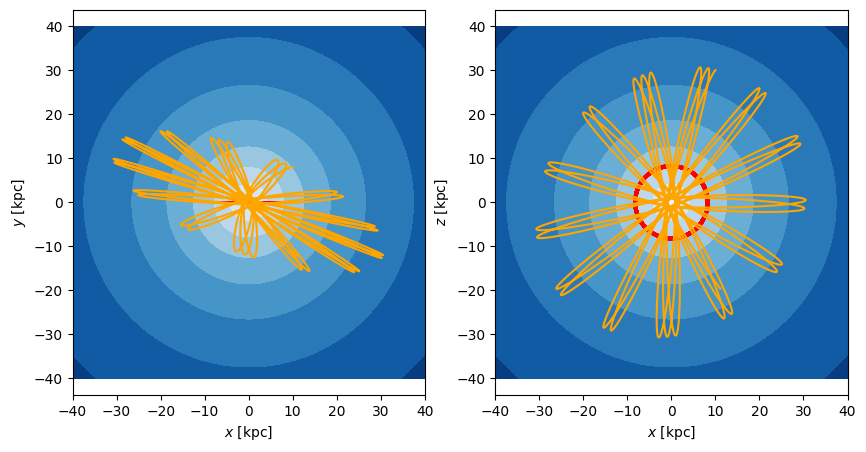

<Figure size 640x480 with 0 Axes>

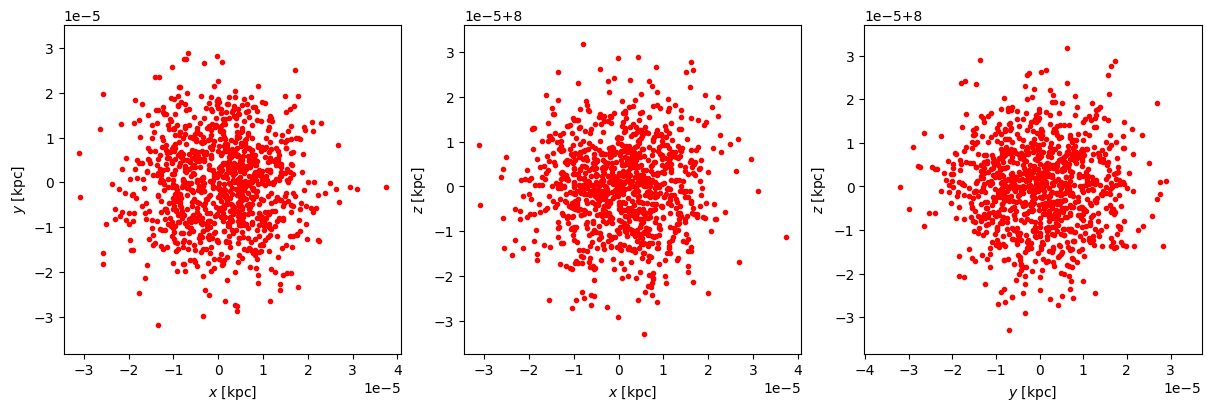

<Figure size 640x480 with 0 Axes>

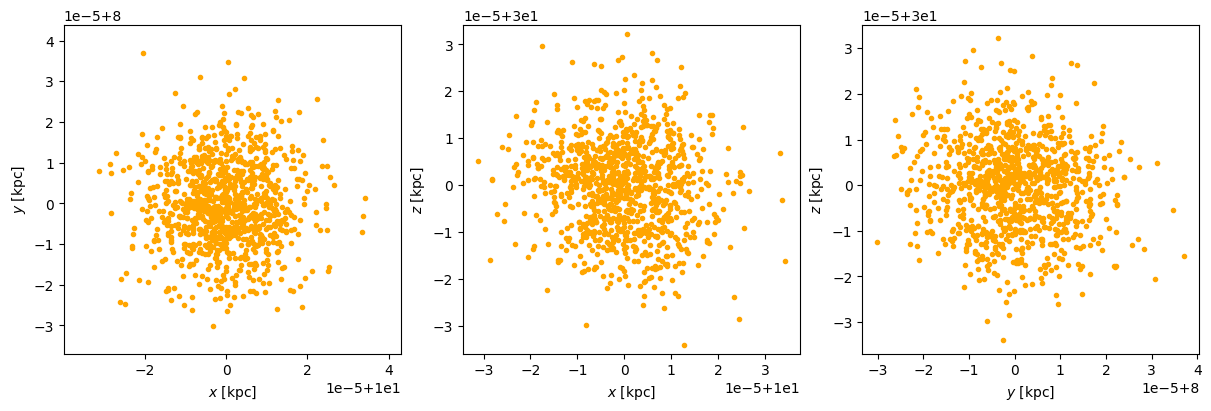

<Figure size 640x480 with 0 Axes>

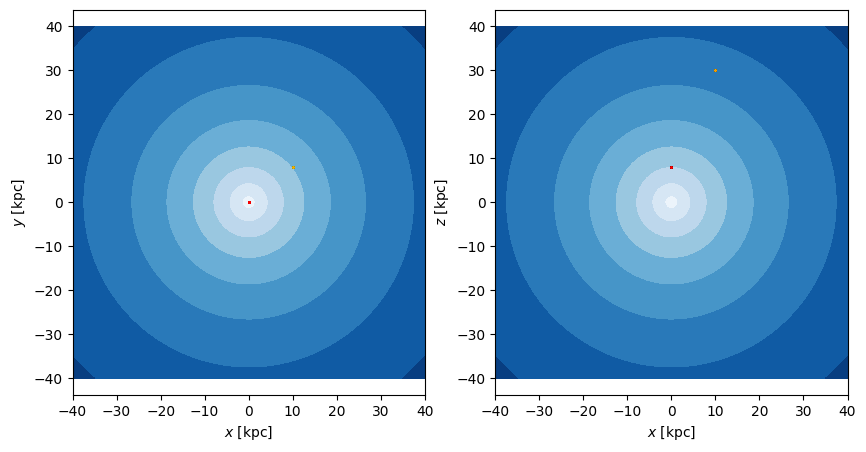

<Figure size 640x480 with 0 Axes>

<Figure size 2500x500 with 0 Axes>

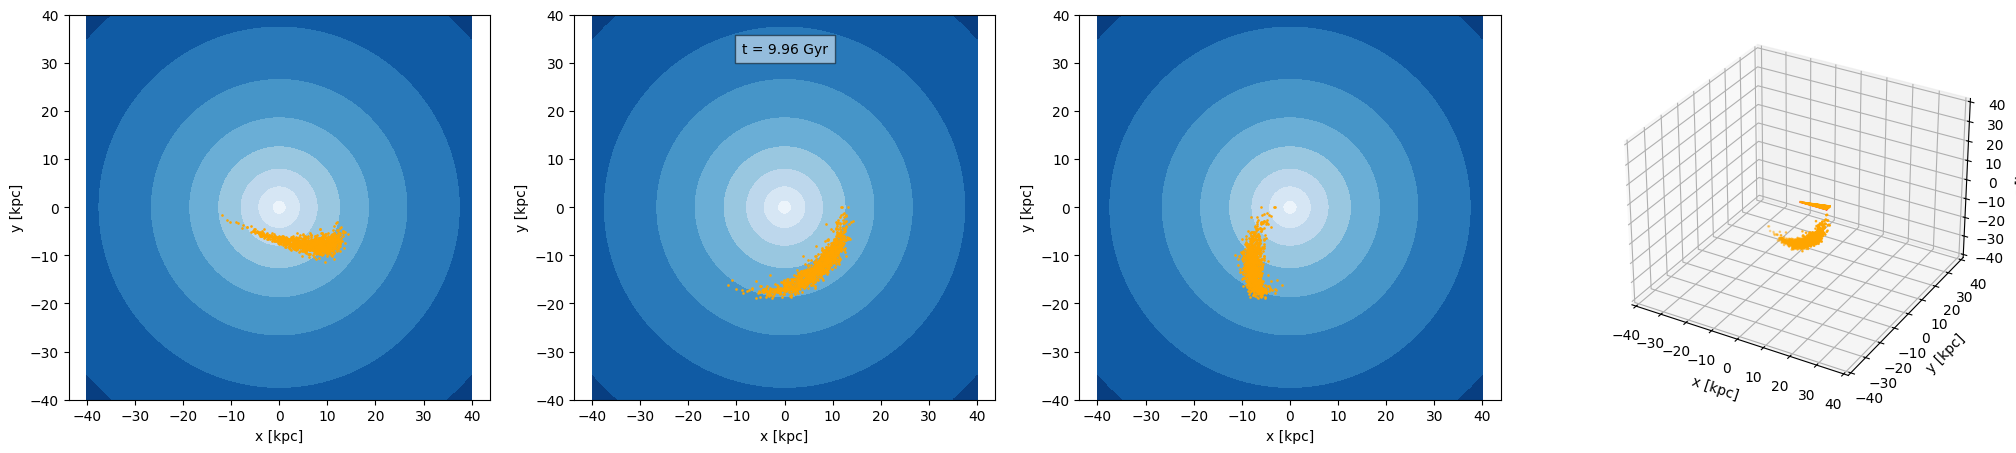

<Figure size 640x480 with 0 Axes>

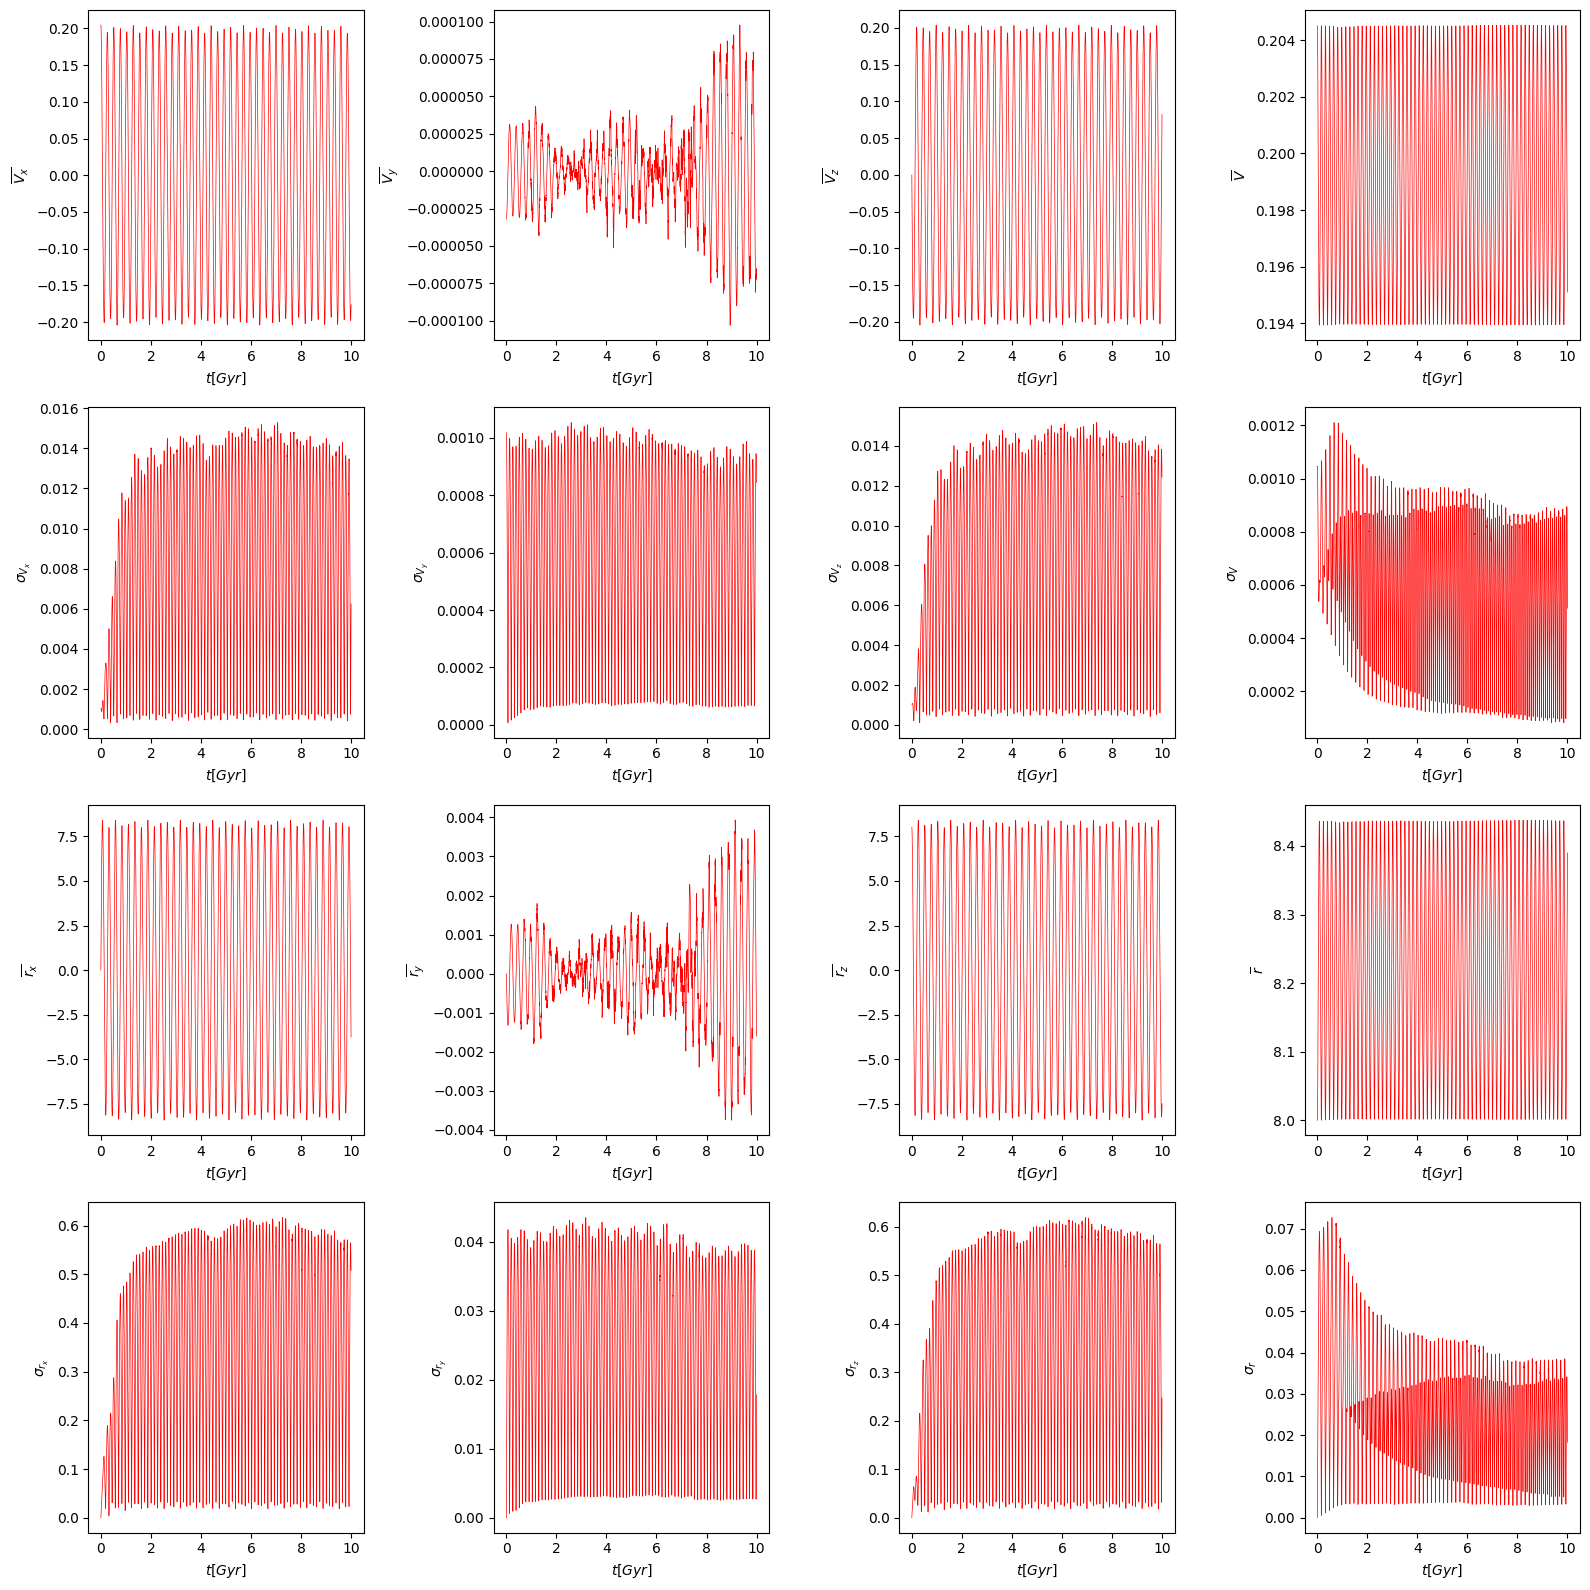

<Figure size 640x480 with 0 Axes>

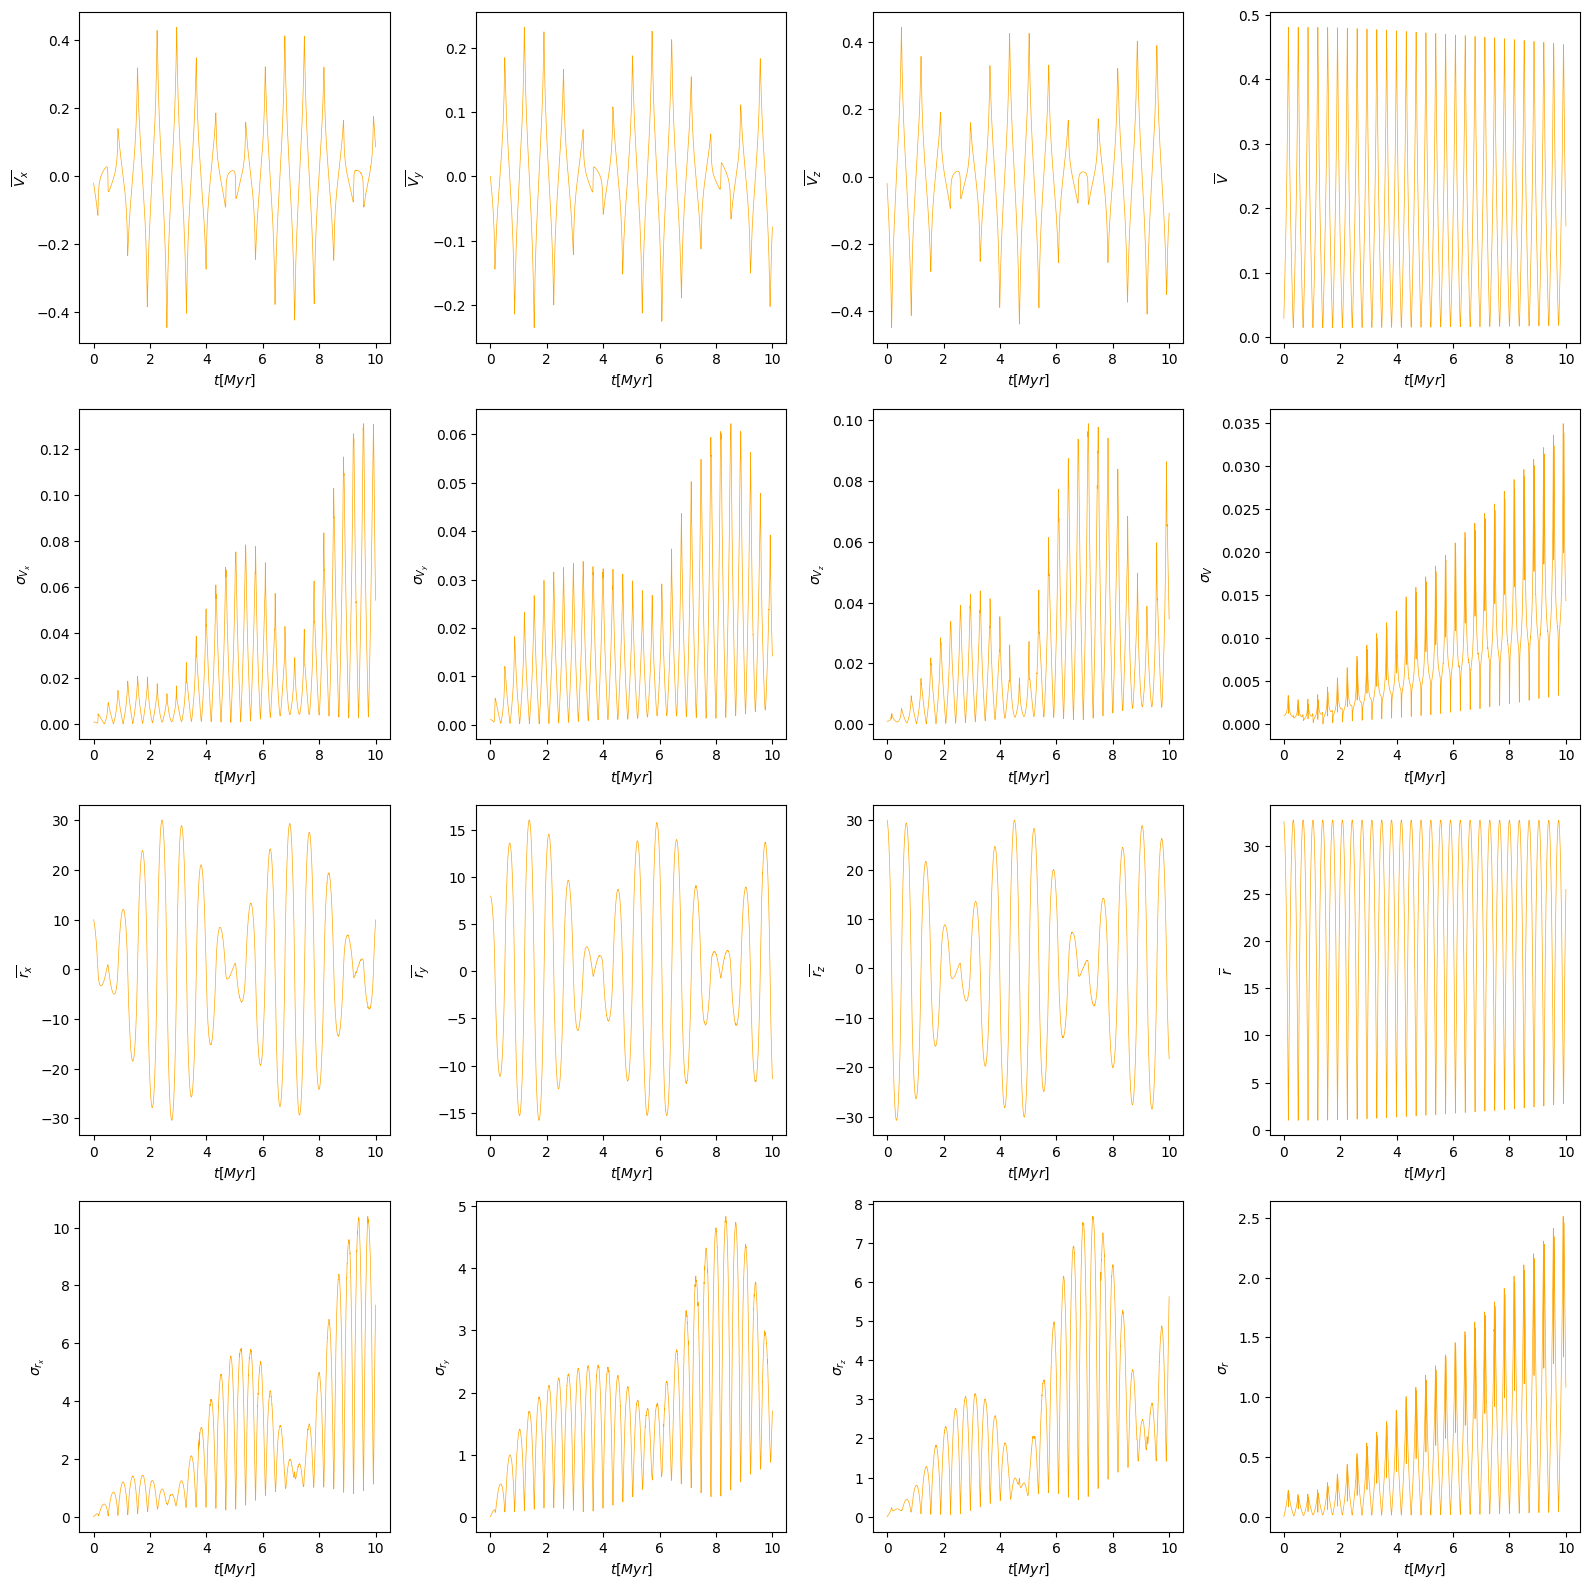

<Figure size 640x480 with 0 Axes>

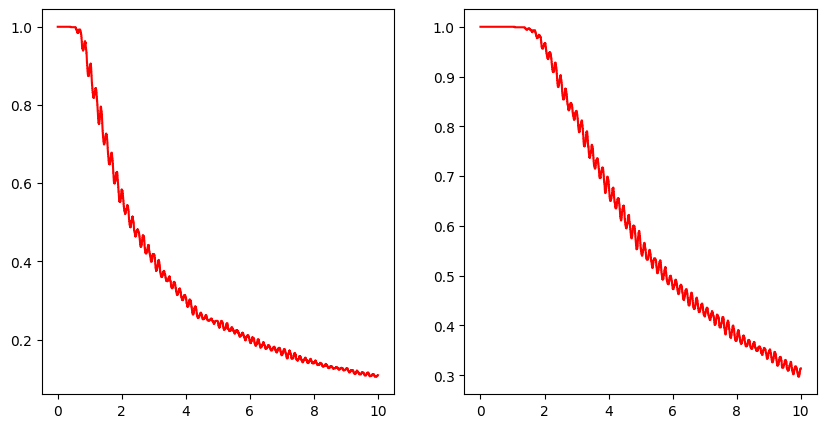

<Figure size 640x480 with 0 Axes>

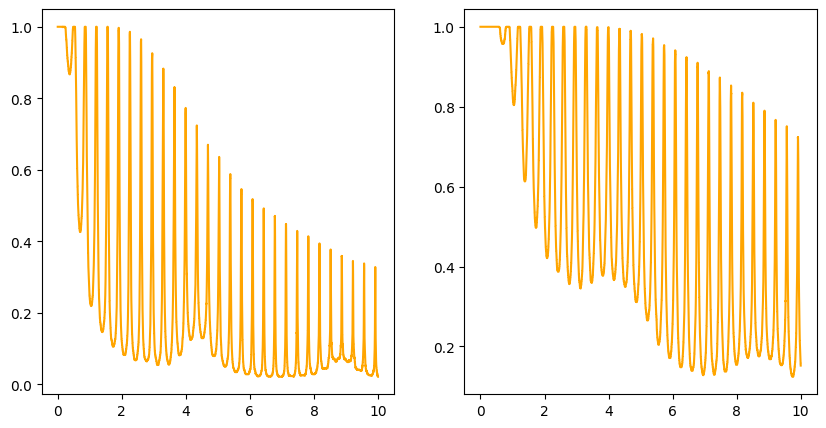

<Figure size 640x480 with 0 Axes>

In [27]:
# Repitiendo items anteriores para probar :D
# Sigma estupidamente bajo xddd
import gala.dynamics as gd
r_1 = [0,0,8] * u.kpc
v_1 = [200,0,0] * (u.km/u.s)
r_2 = [10,8,30] * u.kpc
v_2 = [-20,0,-20] * (u.km/u.s)
sphPot = gp.NFWPotential.from_M200_c(M200 = 1.842e12 * u.M_sun, c= 16.098, units=galactic)

list1NFW, list2NFW, rho1_1NFW, rho1_2NFW, rho2_1NFW, rho2_2NFW = the_whole_damn_thing(sphPot,r_1,v_1,r_2,v_2, animate=True)

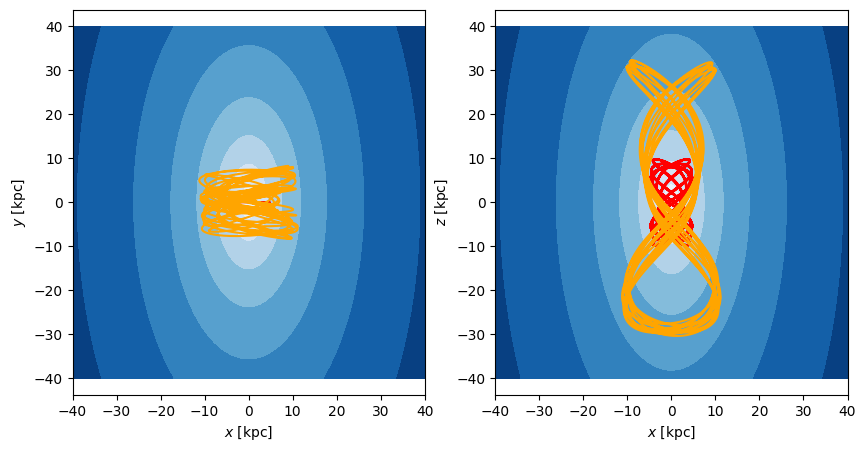

<Figure size 640x480 with 0 Axes>

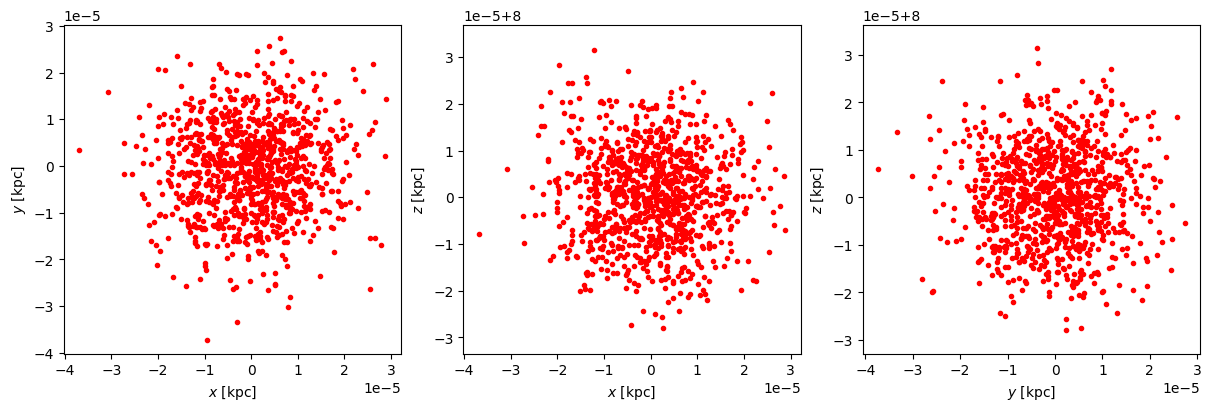

<Figure size 640x480 with 0 Axes>

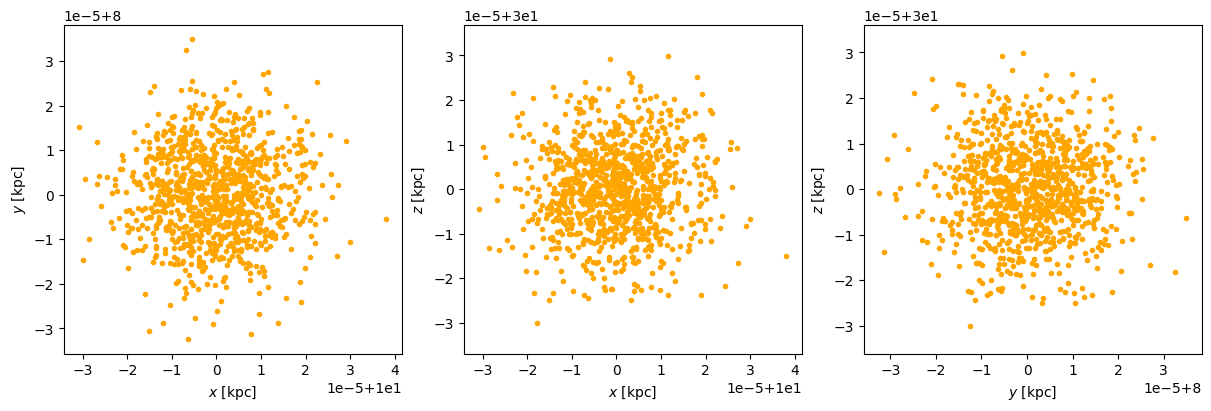

<Figure size 640x480 with 0 Axes>

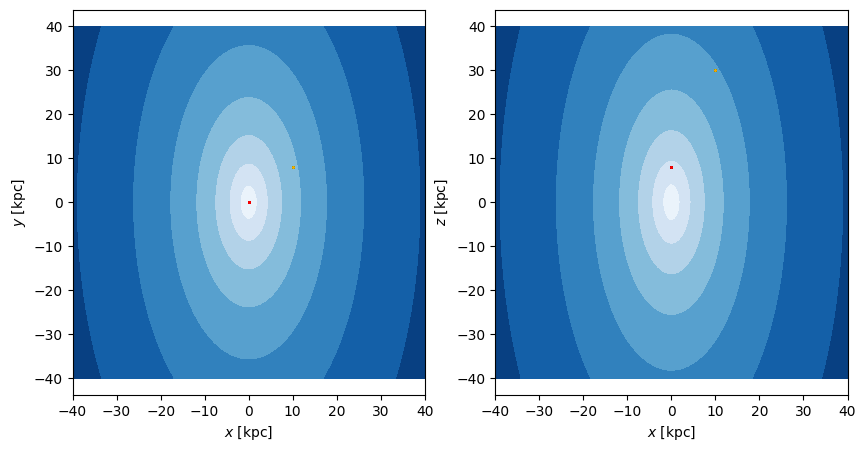

/home/mbugueno/anaconda3/envs/galaenv/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:419: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/home/mbugueno/anaconda3/envs/galaenv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/mbugueno/anaconda3/envs/galaenv/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:424: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


<Figure size 640x480 with 0 Axes>

<Figure size 2500x500 with 0 Axes>

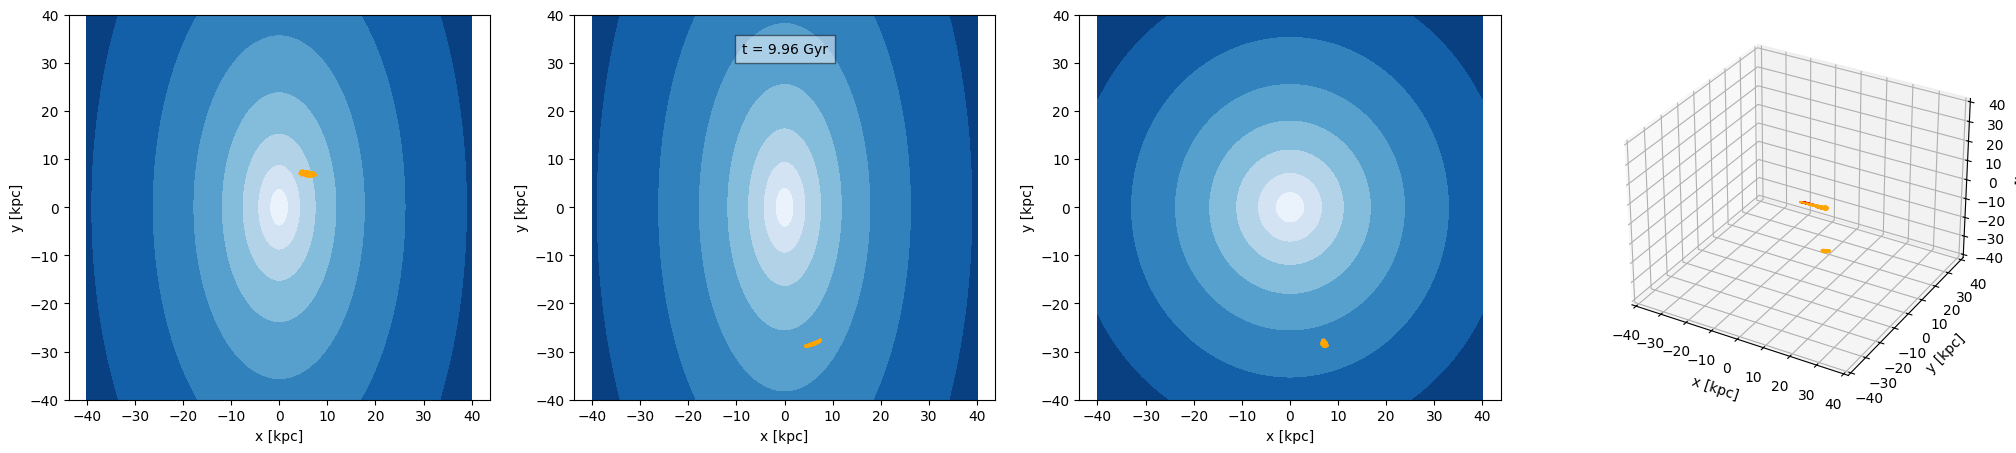

<Figure size 640x480 with 0 Axes>

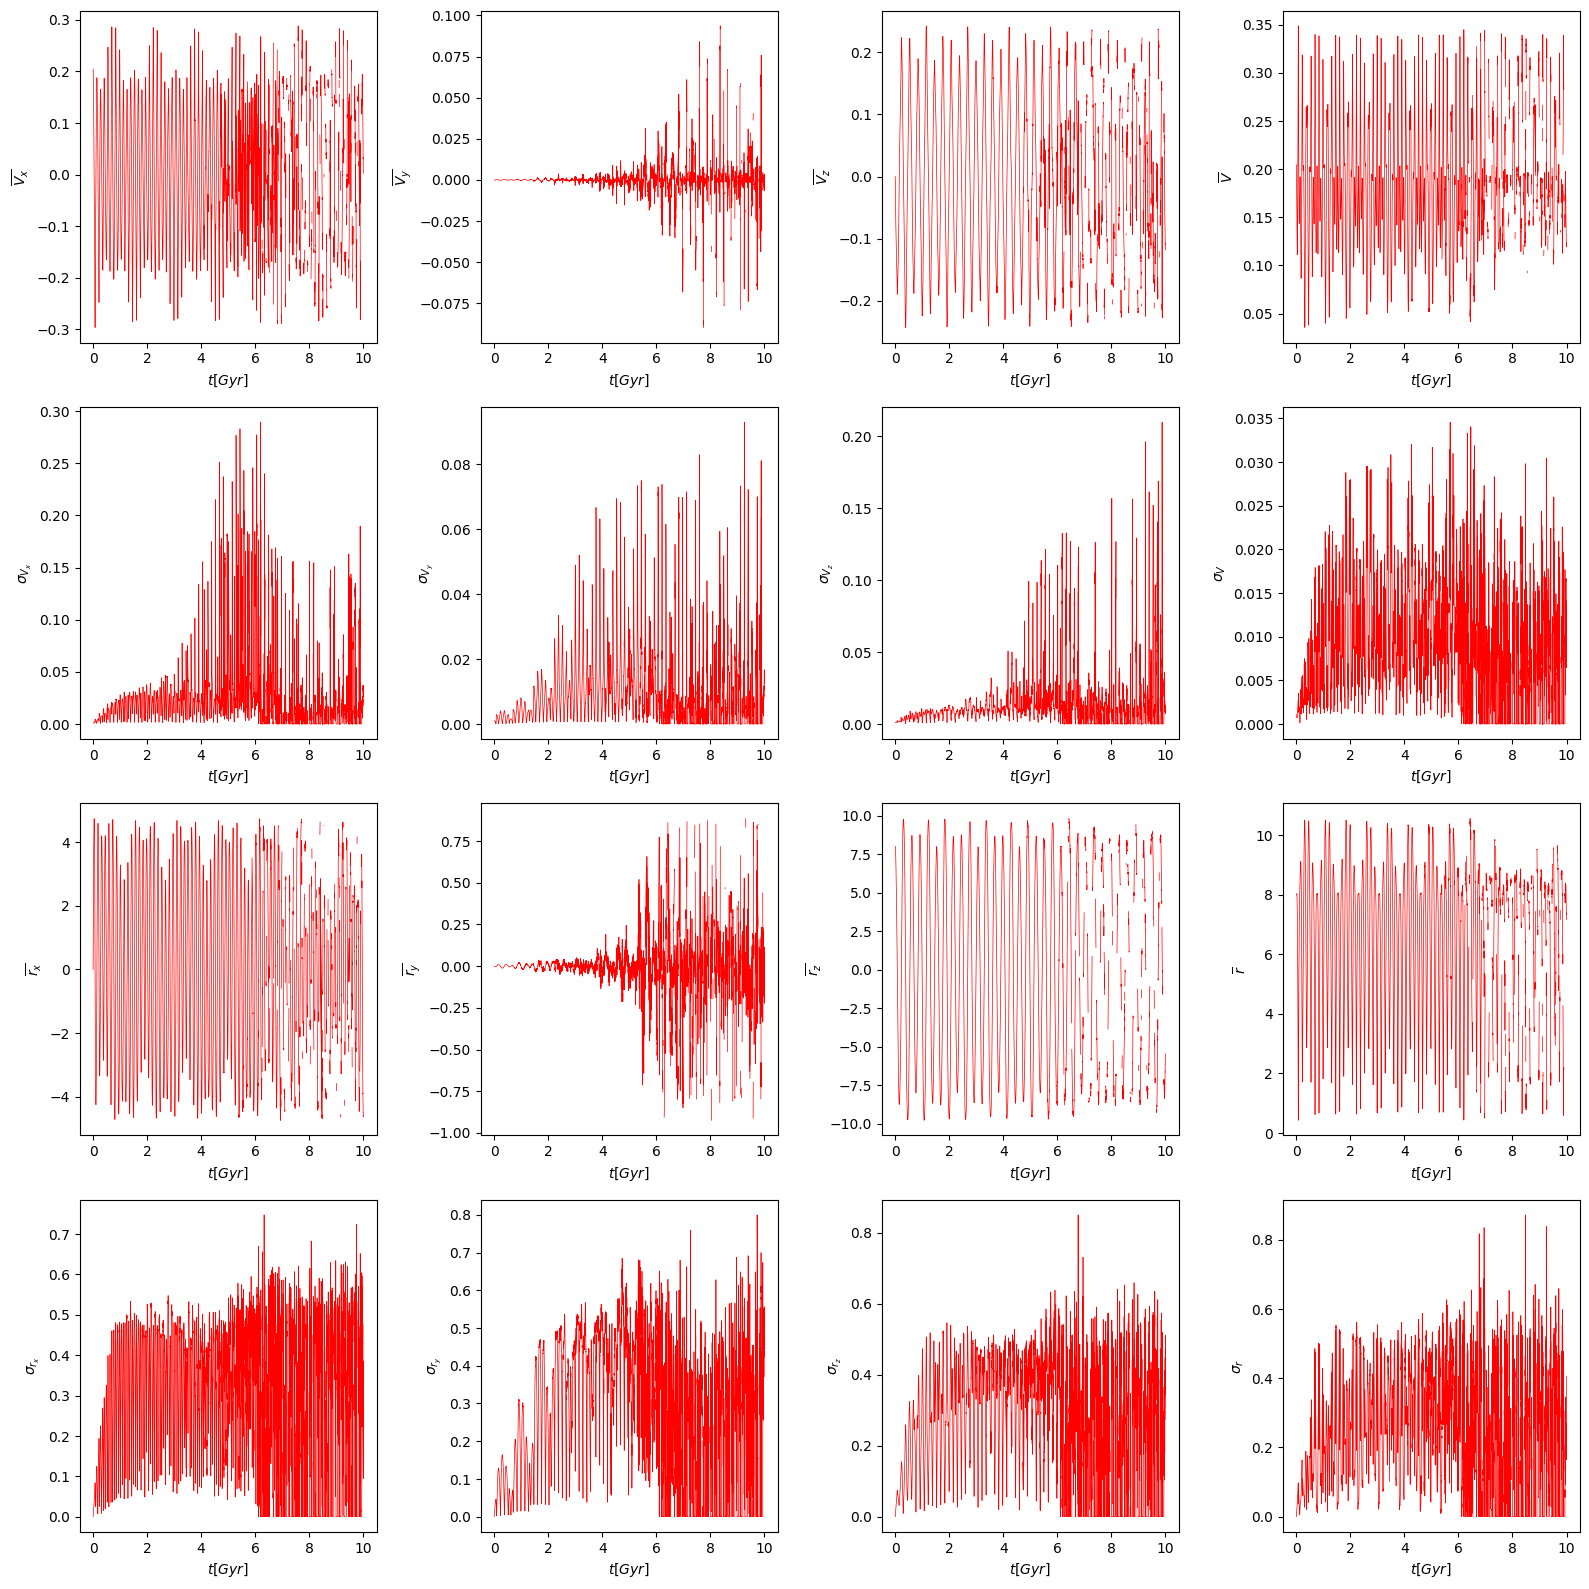

<Figure size 640x480 with 0 Axes>

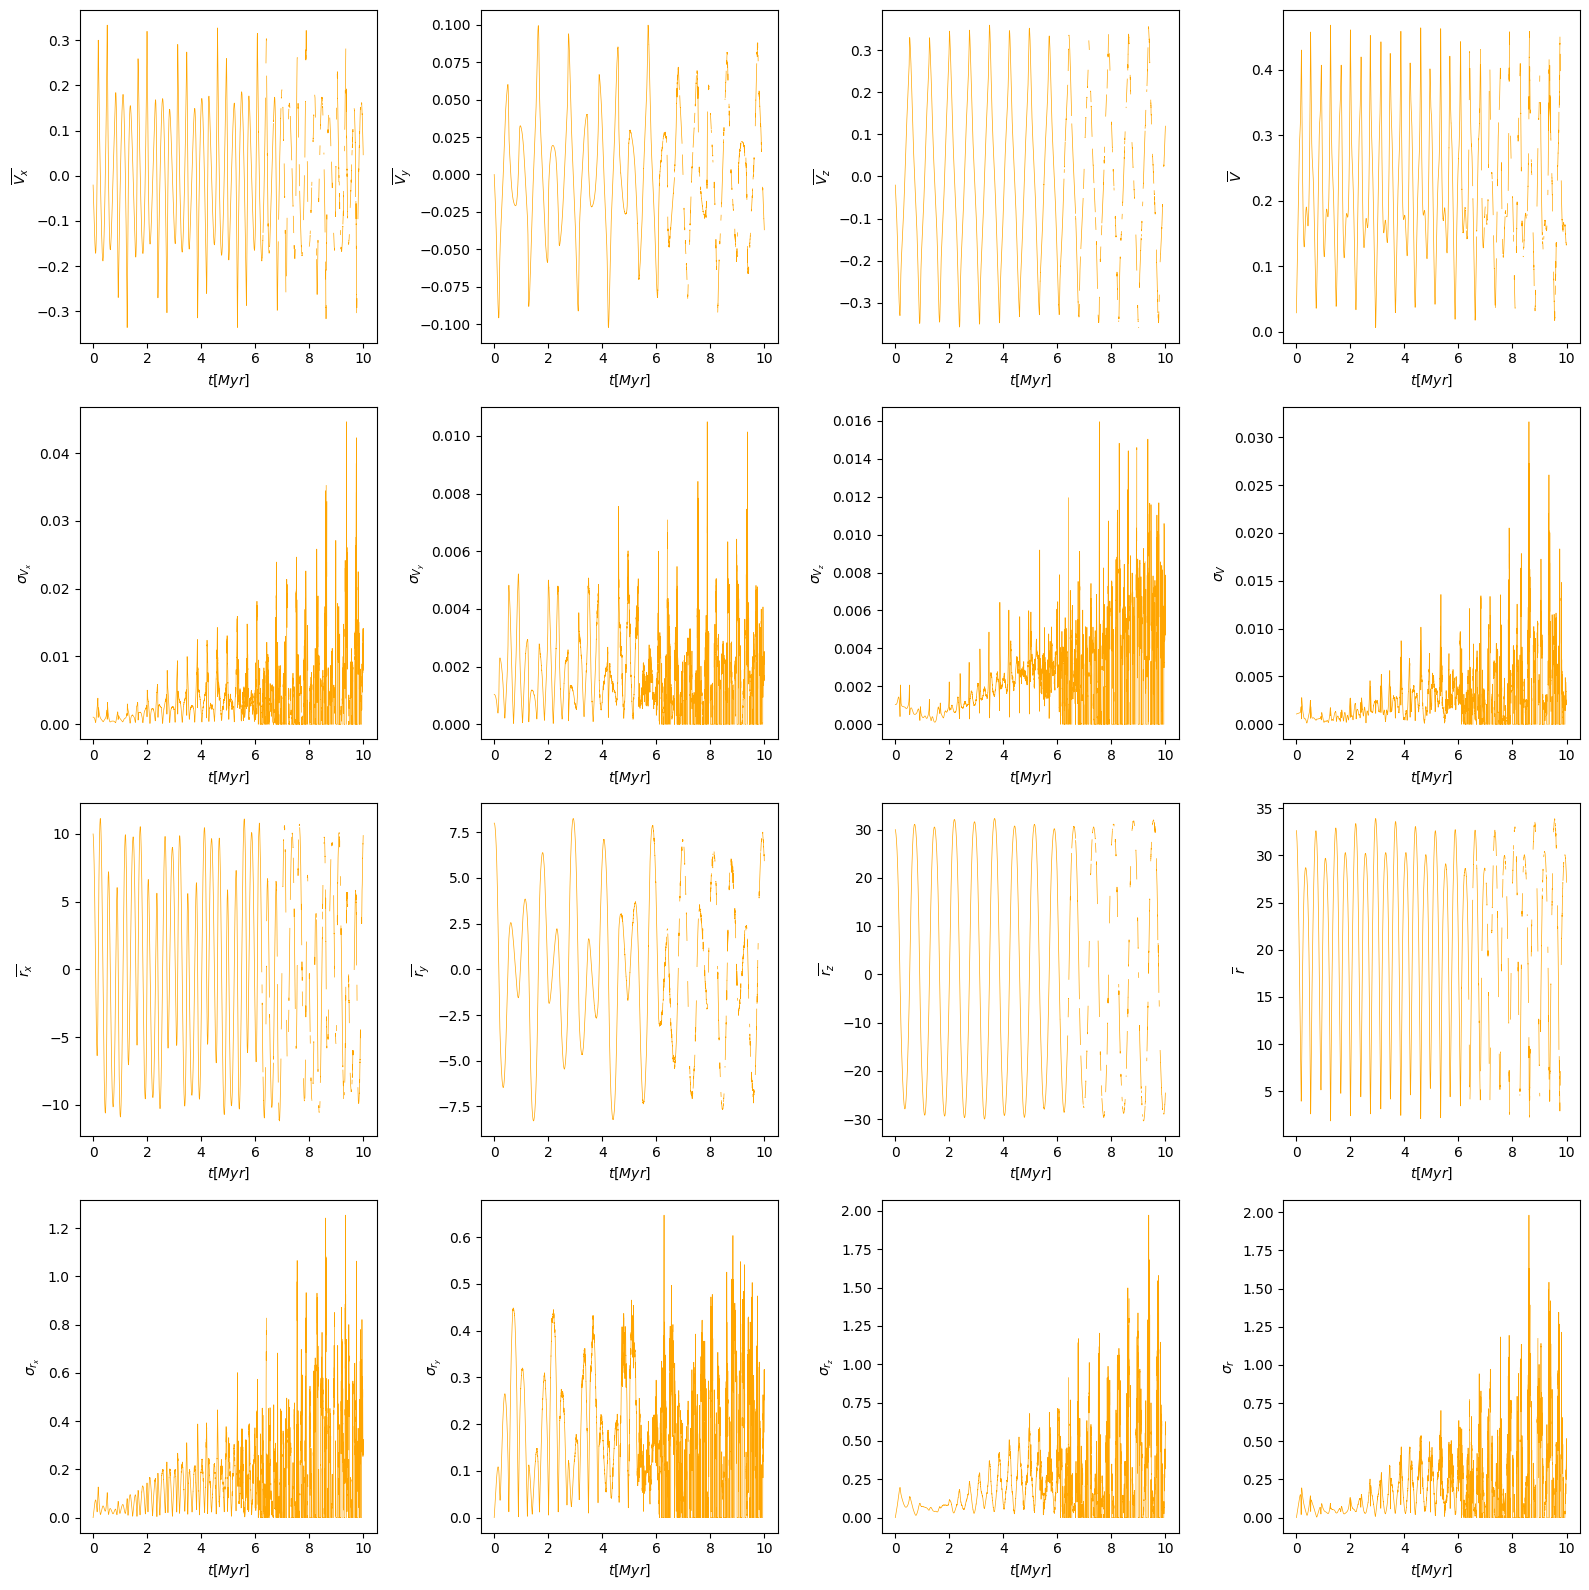

<Figure size 640x480 with 0 Axes>

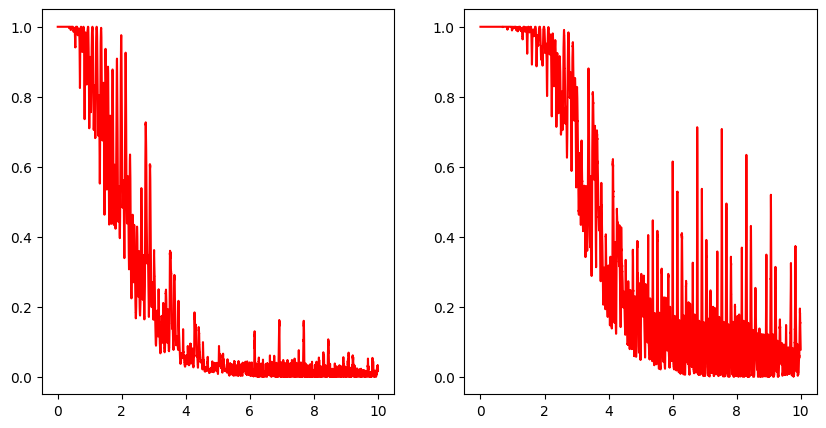

<Figure size 640x480 with 0 Axes>

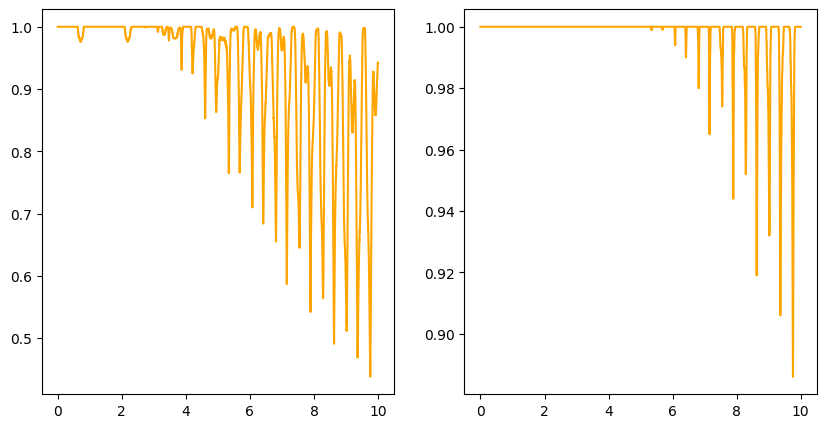

<Figure size 640x480 with 0 Axes>

In [28]:
r_1 = [0,0,8] * u.kpc
v_1 = [200,0,0] * (u.km/u.s)
r_2 = [10,8,30] * u.kpc
v_2 = [-20,0,-20] * (u.km/u.s)
potential = gp.NFWPotential(m=1e12*u.M_sun, r_s=15*u.kpc, a=0.7, b=1.4, c=1.5, units=galactic)

list1axial, list2axial, rho1_1axial, rho1_2axial, rho2_1axial, rho2_2axial = the_whole_damn_thing(potential,r_1,v_1,r_2,v_2, animate=True)

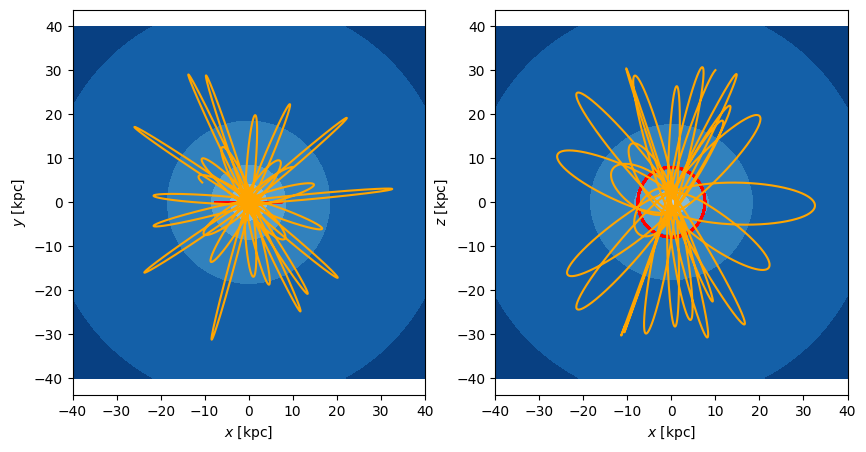

<Figure size 640x480 with 0 Axes>

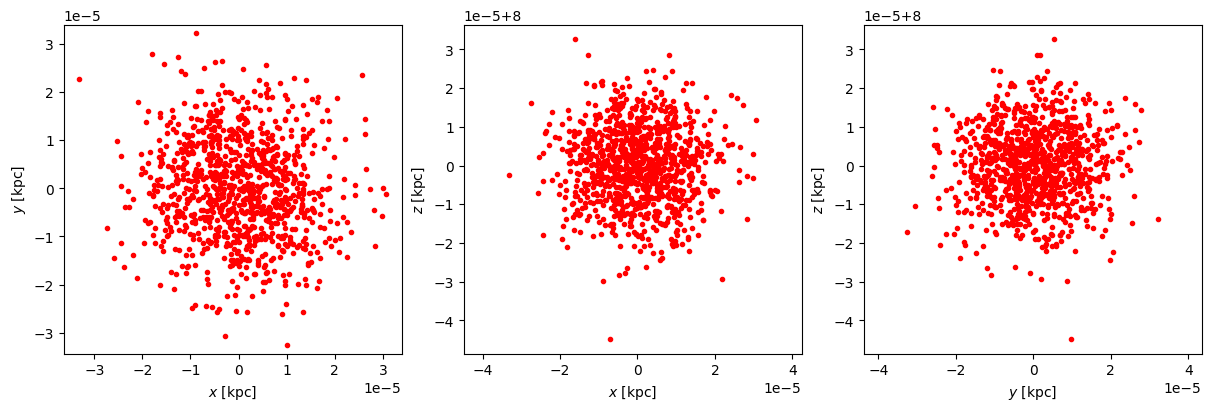

<Figure size 640x480 with 0 Axes>

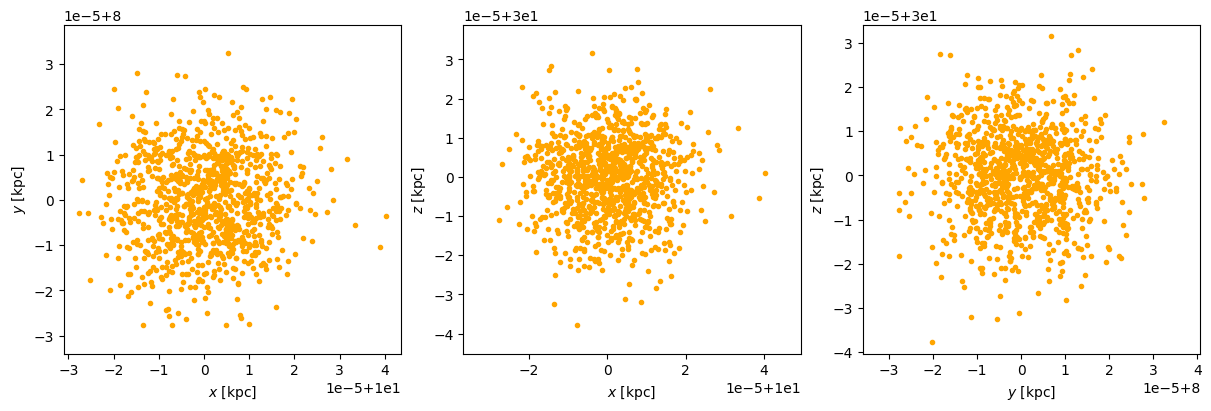

<Figure size 640x480 with 0 Axes>

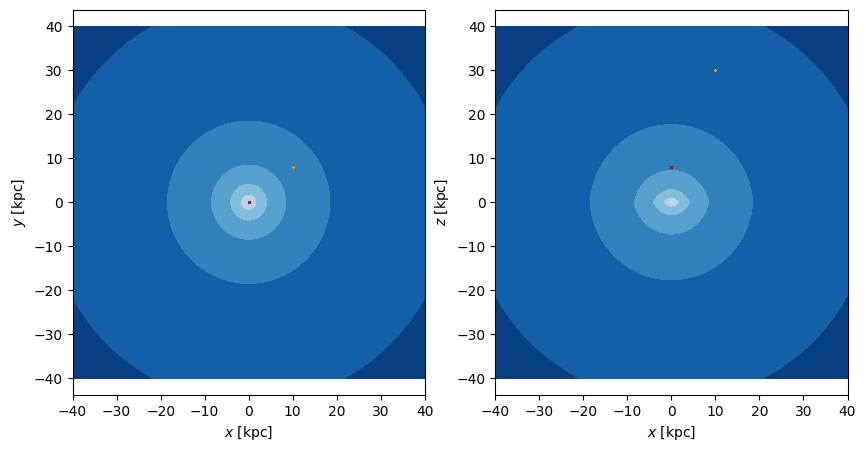

In [ ]:
r_1 = [0,0,8] * u.kpc
v_1 = [200,0,0] * (u.km/u.s)
r_2 = [10,8,30] * u.kpc
v_2 = [-20,0,-20] * (u.km/u.s)
mwpotential = gp.MilkyWayPotential()

list1MW, list2MW, rho1_1MW, rho1_2MW, rho2_1MW, rho2_2MW = the_whole_damn_thing(mwpotential,r_1,v_1,r_2,v_2, animate=True)

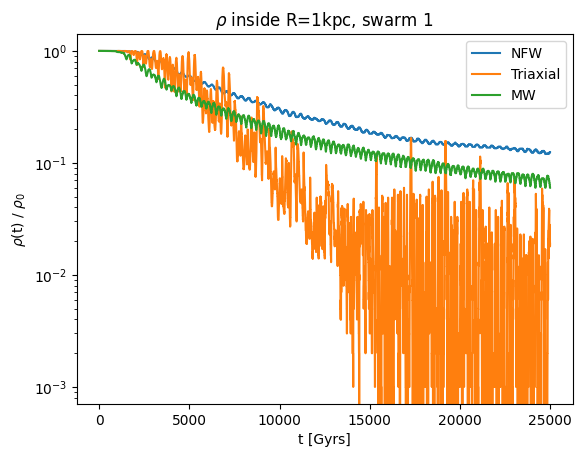

In [20]:
plt.plot(rho1_1NFW, label='NFW')
plt.plot(rho1_1axial, label='Triaxial')
plt.plot(rho1_1MW, label='MW')
plt.yscale('log')
plt.ylabel(r'$\rho$(t) / $\rho_0$')
plt.xlabel(r't [Gyrs]')
plt.title(r'$\rho$ inside R=1kpc, swarm 1')
plt.legend()

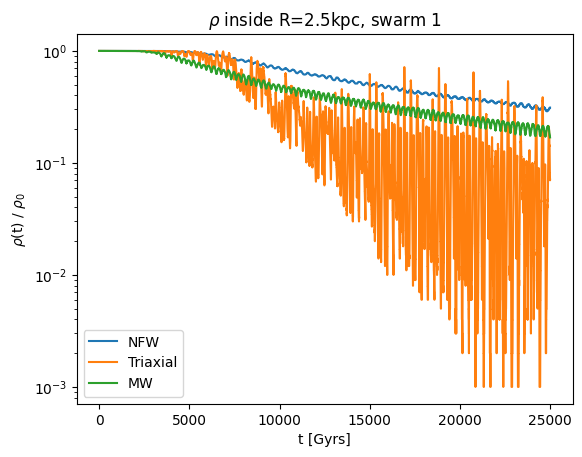

In [21]:
plt.plot(rho1_2NFW, label='NFW')
plt.plot(rho1_2axial, label='Triaxial')
plt.plot(rho1_2MW, label='MW')
plt.yscale('log')
plt.ylabel(r'$\rho$(t) / $\rho_0$')
plt.xlabel(r't [Gyrs]')
plt.title(r'$\rho$ inside R=2.5kpc, swarm 1')
plt.legend()

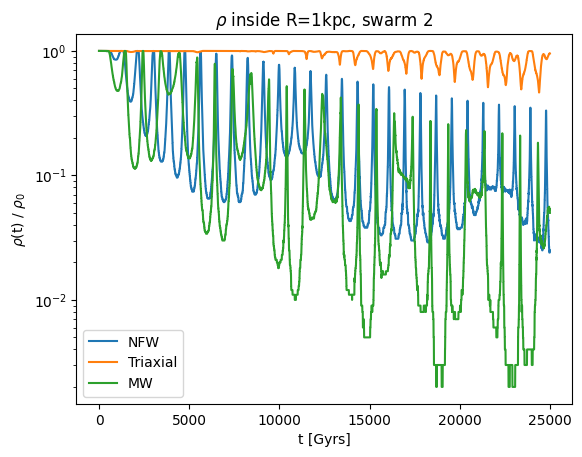

In [22]:
plt.plot(rho2_1NFW, label='NFW')
plt.plot(rho2_1axial, label='Triaxial')
plt.plot(rho2_1MW, label='MW')
plt.yscale('log')
plt.ylabel(r'$\rho$(t) / $\rho_0$')
plt.xlabel(r't [Gyrs]')
plt.title(r'$\rho$ inside R=1kpc, swarm 2')
plt.legend()

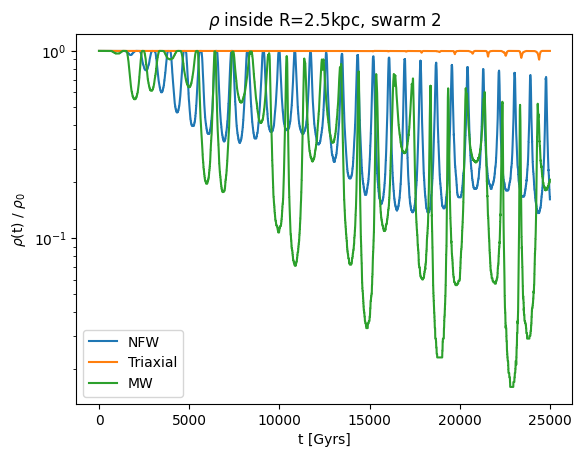

In [23]:
plt.plot(rho2_2NFW, label='NFW')
plt.plot(rho2_2axial, label='Triaxial')
plt.plot(rho2_2MW, label='MW')
plt.yscale('log')
plt.ylabel(r'$\rho$(t) / $\rho_0$')
plt.xlabel(r't [Gyrs]')
plt.title(r'$\rho$ inside R=2.5kpc, swarm 2')
plt.legend()

### 9) Comparar resultados y discutir
Es cuando comparamos la densidad en los distintos potenciales que vemos el significado de estos mismos en los enjambres simulados, el swarm 1 que fue seleccionado a proposito por tener una trayectoria circular en cuanto a su origen se ve sin mucha diferencia entre los potenciales NFW y MW, esto tiene sentido ya que el NFW base seleccionado ya es similar al de la mw, a lo mas la densidad del enjambre tiene un tiempo de mixing levemente menor.

En el caso del swarm1 en el potencial triaxial, se ve enormemente afectado, esto tiene sentido ya que el potencial seleccionado es enormemente triaxial(a=0.7 b=1.4 c=1.5), ademas al tener orbitas mayormente regulares en el enjambre, este no se mueve como un conjunto sino que se extiende a lo largo de la orbita central, estirandose(similar a un stream de estrellas, sin embargo por mecanismo distinto, no tenemos self-gravitacion en este caso)

En el caso del swarm2 nuevamente el MW y NFW terminan siendo extremadamente similares, y el caso del triaxial mas distinto, se considera que la razon para esto es debido a la cercania que pasa el mismo del centro, en el caso MW, tenemos un bulbo y core entre los potenciales considerados disruptiendo asi la orbita obtenida, en el caso del triaxial, la orbita inicial es mas bien regular, cubriendo densamente una region designada delimitada por rmin y rmax.


Se saca de la conclusion de todo esto, que en terminos dinamicos las propiedades de una estructura estan dictadas por 3 factores clave:
- El potencial en el cual se encuentra(potenciales mas complejos llevan a menor cantidad de integrales de movimiento, perjudicando asi las orbitas dentro de los mismos)
- La configuracion en el espacio de fases, esto en esencia dictamina la energia total de nuestra orbita(asumiendo conservacion de energia, caso contrario es energia total inicial)
- Y la simetria del potencial, ya que potenciales simetricamente esfericos preservan una integral de movimiento.

Es pensando en las integrales de movimiento y como se ven afectadas por propiedades del sistema, el como podemos determinar las orbitas del mismo. Sin embargo hay consideraciones que tener en cuenta en el trabajo presentado:
- Los enjambres no interactuan de ninguna manera entre ellos, en la realidad, los objetos si bien por si solos ejercen una fuerza gravitacional infima en los otros objetos, el conjunto completo si ejerce una fuerza significativa dentro de la region local del enjambre, teniendo asi que considerar otros efectos(tidal distruption, dynamical friction, tidal shocks)
- Todos los potenciales son constantes en el tiempo en el caso presentado, en la realidad tenemos ciertos potenciales como los ejercidos por barras y brazos que varian con el tiempo, perdiendo asi una integral de movimiento debido a que ejercen un torque en ciertos instantes de tiempo.

Aun con todo es gracias a este ejercicio que se pueden apreciar los mecanismos mas fundamentales, en la interaccion dinamica entre objetos.